## Objective:  Modeling of strength of high performance concrete using Machine Learning

### Business objective based models:
       To Generate machine learning model to predict the strength of the concrete for the given compnets so that we can easily dtermine the composoition of the components requiered to obtain a desiered strength. By doing so it will reduce the cost spent on building the sample for different combination of compositon of the particulars and determine best combination for desiered strength. This will create greater impact in the cost saving.

In [1]:
import numpy as np # For doing algebric/mathematical calculation/operations.
import pandas as pd #For creating, analyzing/dataprocessing dataframes.
import matplotlib.pyplot as plt # For visualization of data.
import seaborn as sns           # For visualization of data. 
from sklearn.model_selection import cross_val_score, train_test_split,cross_validate, GridSearchCV, StratifiedKFold # To do cross_validation on the model to check its performance.
from sklearn.preprocessing import StandardScaler     #To Normalize the data without changing the shape of the distribution.
from statsmodels.stats.outliers_influence import variance_inflation_factor    #To test the multicollinearity between the features.
from sklearn.svm import SVC    # To create model using Support Vector Classifier.
from sklearn.metrics import accuracy_score     #To measure the performance of the model.
from sklearn.decomposition import PCA          #To peerform Dimensionality Reduction using Principal Component Analysis.
from sklearn.cluster import KMeans             # For doing Cluster analysis and select the features we import the unsupervised leasrning technique.
from mlxtend.feature_selection import SequentialFeatureSelector as SFS #To select the right features we use one of the wraper methods.
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs #Ploting the features vs the performance on the training the data based on the resuts from SFS.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split #Performing theModel splitting, hypetuning the models and cross validating
from sklearn.tree import DecisionTreeRegressor  #To build model using DecissionTreeRegressor using the tree module available in the sklearn package.
from sklearn.svm import SVR                     #To build model using SupportVectorRegressor using the SVM module available in the sklearn package.
from sklearn.neighbors import KNeighborsRegressor #To build model using DecissionTreeRegressor using the tree module available in the sklearn package.
from sklearn.pipeline import Pipeline             # For undergoing the modeling process in a sequential manner automatically.
from sklearn.pipeline import make_pipeline        # For undergoing the modeling process in a sequential manner automatically.
from sklearn import tree #To create tree visualization.
from sklearn.preprocessing import PolynomialFeatures #To generate polynomial features of orginal features.
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor #To build model using Ensemble technique algorithms.
from sklearn.linear_model import LinearRegression  #To create linear model.
from mlxtend.regressor import StackingRegressor #To build model using single stge StackingRegressor using the regressor module available in the mlxtend package.
from sklearn.utils import resample              #To generate Bootstrap samples.
import graphviz #To visualize the Decission Tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings # To Avoid the warnings.
warnings.filterwarnings(action = 'ignore') #To eleminate future warnings.

======================================================================================================================

# 1. Deliverable -1 (Exploratory data quality report reflecting the following) (20 Marks)

# 2. Deliverable -2 (Feature Engineering techniques) (15 marks)

### Step 2: Understanding the Data:

#### a. Reading the Data and structure of the file:

In [2]:
data = pd.read_csv('concrete.csv') #For Importing the data.
data #For visualizing the imported data.

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1030 rows x 9 columns]

##### Inference on the above output:

1. There are 18 columns with one column as label, totally 19 columns in this file.
2. the structure of the file is in form of dataframe, which is read using pandas and input in to this notebook.

#### b.Understanding the shape of the Data:

In [3]:
data.shape #To know about the shape of the data.

(1030, 9)

##### Inference on the above output:

The data contains 1030 number of records and 9 number of attributes (8 features and 1 label).

#### c.Understanding the informations about the Data and type of attributes of the data:

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### Inference on the above output:
1. All independent attributes are of quantitative datatype.
2. All indeoendent attributes except age attribute is discrete type.
3. The source of information/data also shows that all dependent attributes are measured in the same units except age in days.
4. The Dependent attribute is strenght which is understood from other sources that it indicates the concrete compressive strength measured in MPa.

 ##### Note (Feature Engineering):
 1. It was known from the external sources that there are also few other attributes which are ratios of current attributes that will determine the concrete strength.
 
 2. The new attributes are also created below and tested.

#### Creating new attributes:

In [3]:
# New attribute 1:
data['water/cement'] = data['water']/data['cement']

# New attribute 2:
data['coarseagg/fineagg'] = data['coarseagg']/data['fineagg']

# New attribute 3:
data['agg/cement'] = (data['coarseagg']+data['fineagg'])/data['cement']

data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  water/cement  coarseagg/fineagg  agg/cement  
0     29.89      1.440198           1.298330   12.174805  
1     23.51      0.937241           1.357448   11.113085  
2     29.22      0.749600           1.111124    7.272400  
3     45.85      0.857143           1.391045    6.022556  
4     18.29      1.248708           1.503373   11.266796

##### Inference on the above output:
1. The new features are created based on the external knowledge accumulated.
2. the consideration of the new features into the building of model will be based on the feature selection techniques.

#### d. Measure of Central Tendancy and Measure of Dispersion:

##### Five Number summary:

The Five point summary are:
1. Maximum value
2. 25% quartile
3. Median(50% quartile)
4. 75% quartile
5. Minimum value
    
The above mentioned five points for numerical attributes in the dataframe along with the other descriptive statistics are also available below.

In [18]:
data.describe() #Descriptive Stats

cement         slag          ash        water  superplastic  \
count  1005.000000  1005.000000  1005.000000  1005.000000   1005.000000   
mean    278.631343    72.043483    55.536318   182.075323      6.033234   
std     104.344261    86.170807    64.207969    21.339334      5.919967   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     190.700000     0.000000     0.000000   166.600000      0.000000   
50%     265.000000    20.000000     0.000000   185.700000      6.100000   
75%     349.000000   142.500000   118.300000   192.900000     10.000000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  water/cement  \
count  1005.000000  1005.000000  1005.000000  1005.000000   1005.000000   
mean    974.376816   772.688259    45.856716    35.250378      0.756220   
std      77.579667    80.340435    63.734692    16.284815      0.313524   
min     801.000000   594.000000     1.000000     2.330000      0.266893   
25%     932.000000   724.300000     7.000000    23.520000      0.547465   
50%     968.000000   780.000000    28.000000    33.800000      0.689531   
75%    1031.000000   822.200000    56.000000    44.870000      0.937241   
max    1145.000000   992.600000   365.000000    82.600000      1.882353   

       coarseagg/fineagg   agg/cement  
count        1005.000000  1005.000000  
mean            1.277058     7.264605  
std             0.185244     2.885819  
min             0.858453     3.097760  
25%             1.121488     4.965924  
50%             1.283605     6.640000  
75%             1.358146     9.566069  
max             1.874876    17.931373

##### Five Point summary visualization:

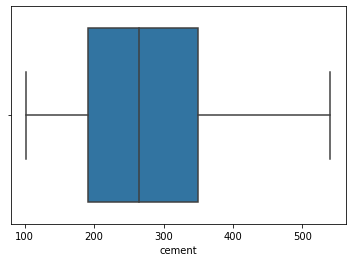

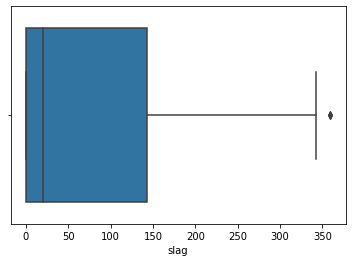

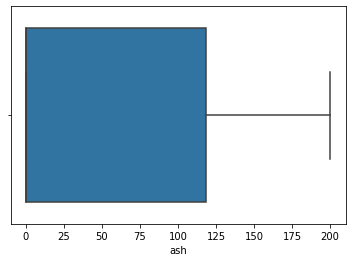

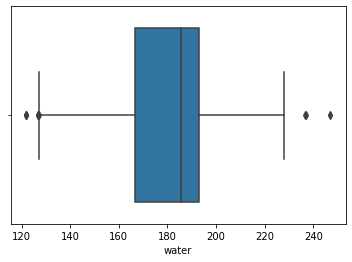

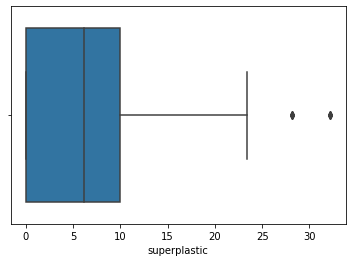

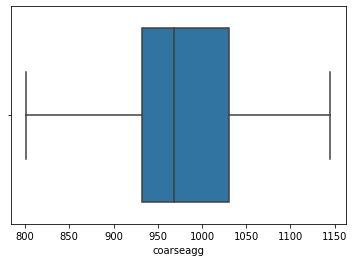

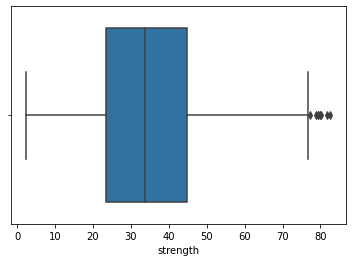

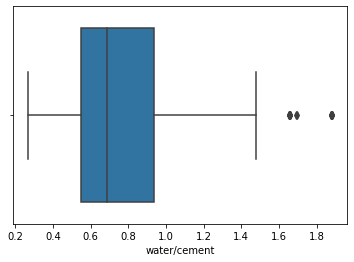

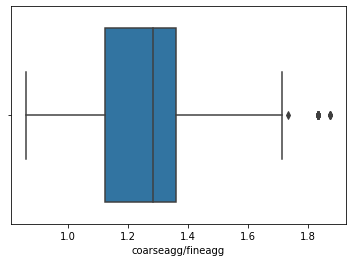

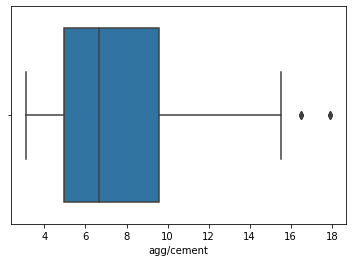

In [19]:
col = data.columns  #Fetching the column names alone.

for column in col:
    sns.boxplot(data[column]) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
    plt.show()

##### Infernce on the above output:
Five point summary can be taken from the above displayed table and box plots for all the features.
For eg let us take attribute Cement	:
 1. min - 102 (m^3).
 2. 25% quartiles - 192.375000 (m^3).
 3. 50% quartiles(median) - 272.900000 (m^3).
 4. 75% quartiles - 350.000000 (m^3).
 5. max - 540 (m^3). 
   
     similarly it can be done for all the other numerical vriables.
 
    From the above table we can infer central tendancy and measure of dispersion:
 For eg let us take Cement:
  1. Measure of central tendancy here is medain(50%) - 272.900 (m^3).
  2. Measure of Dispersion:
     
     a. Range: Max-Min = 438 (m^3).
     
     b. Inter Quartile Range: (75% quartiles) - (25% quartiles) = 157.625 (m^3).
     
     c. Std Dev (Average distance/How far the data is distributed from the mean) - 104.506364 (m^3).

#### The five point summary was also visualized using the boxplot where the left end and right end of the whiskers represnt the min and max values respectively, the box represent 25%, 50%(median) and 75% quartiles. 


#### e.Measure of skewness:
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. The presence of skewness also indicates the mix up of gaussians.

In [20]:
data.skew() #To determine the skewness value of all the features.

cement               0.564959
slag                 0.855225
ash                  0.497231
water                0.034433
superplastic         0.980604
coarseagg           -0.065256
fineagg             -0.252353
age                  3.253974
strength             0.395696
water/cement         0.940469
coarseagg/fineagg    0.628486
agg/cement           0.703442
dtype: float64

##### Inference on the above output:
1. The attributes with the skewness equal to zero have a distribution similar to Normal Distribution.
2. The attributes with the skewness greater than zero have its distribution shifted towards left and tailed in the right.
3. The attributes with the skewness less than zero have its distribution shifted towards right and tailed in the left.

#### f.Measure of Kurtosis:
 Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

In [30]:
data.kurtosis()

cement               -0.520652
slag                 -0.508175
ash                  -1.328746
water                 0.122082
superplastic          1.411269
coarseagg            -0.599016
fineagg              -0.102177
age                  12.168989
strength             -0.313725
water/cement          0.734130
coarseagg/fineagg     1.001954
agg/cement            0.081851
dtype: float64

##### Inference on the above output:
1. The attributes with Kurtosis value equalt to zero have no tails or no mix up of gaussians.
2. The attributes with Kurtosis value greater than indicates the tails are heavily tailed.
3. The attributes with Kurtosis value lesser than indicates the tails are lightly tailed.

===================================================================================================================

# Data Preprocessing (Part- 1):

 Data Preprocessing involves:
 1. Data Imputation (shown in DP_Step:1).
 2. Duplicate Rows treatment (DP_Step:2).
 3. Outlier Detection and Cleaning Process (DP_Step:3).

#### DP_Step 1: Checking for the presence of null values:

In [31]:
data.isnull().values.any() #Checking the presence of null values.

False

In [32]:
data.isnull().sum() #Knowing the attributes that contain null values.

cement               0
slag                 0
ash                  0
water                0
superplastic         0
coarseagg            0
fineagg              0
age                  0
strength             0
water/cement         0
coarseagg/fineagg    0
agg/cement           0
dtype: int64

##### Inference on the above ouput:
    1. Upon doing the Analysis on Base Table the noticable thing was attributes like slag, ash and superplastics have some records that are entered as zero but they can't be treated as missing values because all these attribute are compositions of the elements whose combination going to give give some impact on the age of the cement.
    2. Apart from that there are any other missing values.

#### DP_Step 2: Checking for the presence of duplicate rows:

In [33]:
data.columns.duplicated().any() #checking the presence of redundant columns.

False

In [34]:
data.duplicated().any() #checking the presence of redundant rows.

True

In [87]:
data.duplicated().sum() #Sum of the duplicated rows.

25

In [88]:
data[data.duplicated()] #Dispalying the rows that are duplicated.

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
468   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
482   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
493   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
517   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
525   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
527   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
576   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
577   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   
604   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
733   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
738   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
766   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
830   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
880   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
884   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
892   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
933   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
943   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
967   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
992   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   

     strength  water/cement  coarseagg/fineagg  agg/cement  
278     33.40      0.361176           0.960546    4.092235  
298     33.40      0.361176           0.960546    4.092235  
400     35.30      0.454771           1.249934    4.689741  
420     35.30      0.454771           1.249934    4.689741  
463     77.30      0.454771           1.249934    4.689741  
468     19.69      0.734127           1.417092    7.519841  
482     65.20      0.361176           0.960546    4.092235  
493     79.30      0.454771           1.249934    4.689741  
517     64.30      0.361176           0.960546    4.092235  
525     71.30      0.454771           1.249934    4.689741  
527     65.20      0.361176           0.960546    4.092235  
576     55.90      0.454771           1.249934    4.689741  
577     60.29      0.361176           0.960546    4.092235  
604     77.30      0.454771           1.249934    4.689741  
733     79.30      0.454771           1.249934    4.689741  
738     71.30      0.454771           1.249934    4.689741  
766     79.30      0.454771           1.249934    4.689741  
830     49.20      0.361176           0.960546    4.092235  
880     64.30      0.361176           0.960546    4.092235  
884     49.20      0.361176           0.960546    4.092235  
892     77.30      0.454771           1.249934    4.689741  
933     55.90      0.454771           1.249934    4.689741  
943     35.30      0.454771           1.249934    4.689741  
967     71.30      0.454771           1.249934    4.689741  
992     60.29      0.361176           0.960546    4.092235

In [4]:
data = data.drop_duplicates() #Dropping the rows that are duplicated leaving the orginal one.
data.duplicated().any()       #Rechecking the presence of duplicate rows

False

##### Inference on the above ouput:
1. It was found that the thre were large number of duplicate rows.
2. The duplicated rows were deleted leaving orginal one.

===================================================================================================================

### Step:3 Exploratory Data Analytics:

### Univariate Analysis:

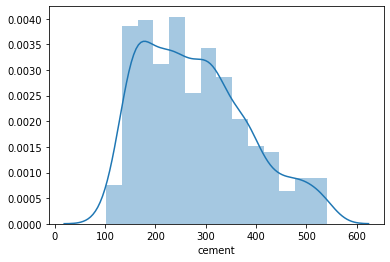

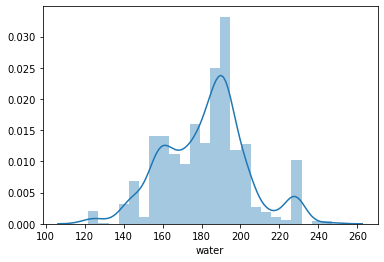

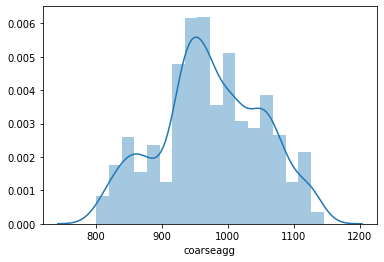

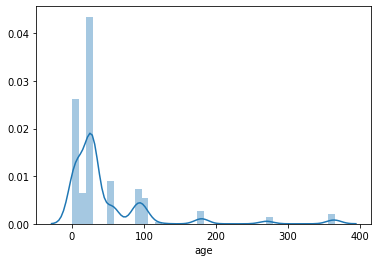

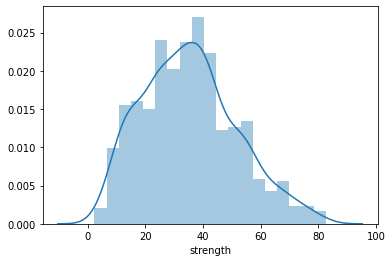

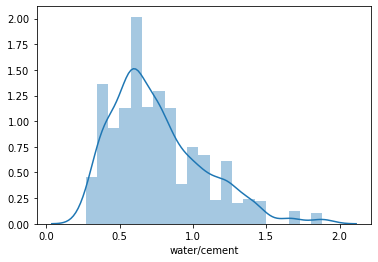

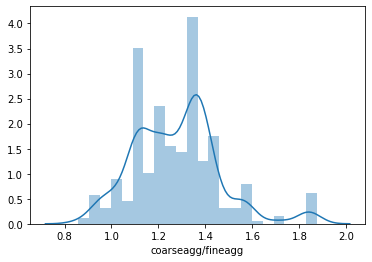

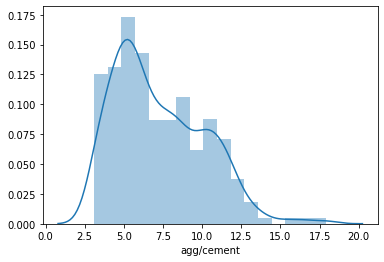

In [38]:
# Printing the distribution plot for the predictors:
for column in col:
    sns.distplot(data[column])
    plt.show()

##### 1. Inference on the Cement plot:
1. This attribute seems to be Right tailed.
2. The distribution appears to be non-parametric distribution and slightly bi-modal.
4. The distribution is fairly symmetrical with right tail.
5. This also shows that attribute is lightly tailed leading to blunt peak.

##### 2. Inference on the slag plot:
1. The attribute seems to be right tailed.
2. The plot seems to be unimodal but the long tail indicating the mix up of gaussians.
3. The distribution is also highly unsymmetrical with the skewness value of 0.800717.
4. The peak is very sharp with light tail indicated by the kurtosis value -0.508175 but there is a little peak and valley .
5. The plot also indicating mix up of gaussians leading to presence of outliers.
6. The distribution is also non-parametric.

##### 3. Inference on the ash plot:
1. The attribute seems to be right tailed.
2. The plot seems to be unimodal but the long tail indicating the mix up of gaussians.
3. The distribution is also highly unsymmetrical with the skewness value of 0.537354.
4. The peak is very sharp with light tail indicated by the kurtosis value -1.328746 but there is a little peak and valley .
5. The plot also indicating mix up of gaussians leading to presence of outliers.
6. The distribution is also non-parametric.

##### 4.Inference on the water plot:
1. The attribute seems to be right tailed.
2. The plot seems to be unimodal.
3. The distribution is also slightly unsymmetrical with the skewness value of 0.074628.
4. The peak is very sharp with light tail indicated by the kurtosis value 0.122082 but there is a little peak and valley.
5. The plot also indicating mix up of gaussians leading to presence of outliers.
6. The distribution is also non-parametric.

##### 5.Inference on the superplastic plot:
1. The attribute seems to be right tailed.
2. The plot seems to be bimodal.
3. The distribution is also slightly unsymmetrical with the skewness value of 0.907203
4. The peak is very sharp with heavy tail indicated by the kurtosis value 1.411269 but there is a little peaks and deep valley. 5. This plot also indicating mix up of gaussians leading to presence of outliers.
5. The distribution is also non-parametric.

##### 6. Inference on the coarseagg plot:
1. The attribute seems to be left tailed.
2. The plot seems to be unimodal.
3. The distribution is also slightly unsymmetrical with the skewness value of -0.040220.
4. The peak is very sharp with lightly tail indicated by the kurtosis value -0.599016 but there is a little peaks and valley.
5. The plot also indicating mix up of gaussians leading to presence of outliers.
6. The distribution is also non-parametric.

##### 7. Inference on the  fineagg plot:
1. The attribute seems to be left tailed.
2. The plot seems to be unimodal.
3. The distribution is also slightly unsymmetrical with the skewness value of -0.253010.
4. The peak is very sharp with lightly tail indicated by the kurtosis value -0.102177 but there is a little peaks and little valley.
5. The plot also indicating mix up of gaussians leading to presence of outliers.
6. The distribution is also non-parametric.

##### 8. Inference on the age  plot:
1. This is a discrete quantitative attribute.
2. The attribute seems to be very right tailed.
3. The plot seems to be unimodal.
4. The distribution is also highly unsymmetrical with the skewness value of 3.269177.
5. The peak is very sharp with heavily tailed indicated by the kurtosis value 12.168989 but there are many peaks and valley.
6. The plot also indicating mix up of gaussians leading to presence of outliers.
7. The distribution is also non-parametric.

##### 9. Inference on the strength  plot:
1. The attribute seems to be right tailed.
2. The plot seems to be unimodal.
3. The distribution is also slightly unsymmetrical with the skewness value of 0.416977.
4. The peak is blunt with light tailed indicated by the kurtosis value -0.313725.
5. The plot also indicating mix up of gaussians leading to presence of outliers.
6. The distribution is also non-parametric.


### Bivariate and Multivariate Analysis:

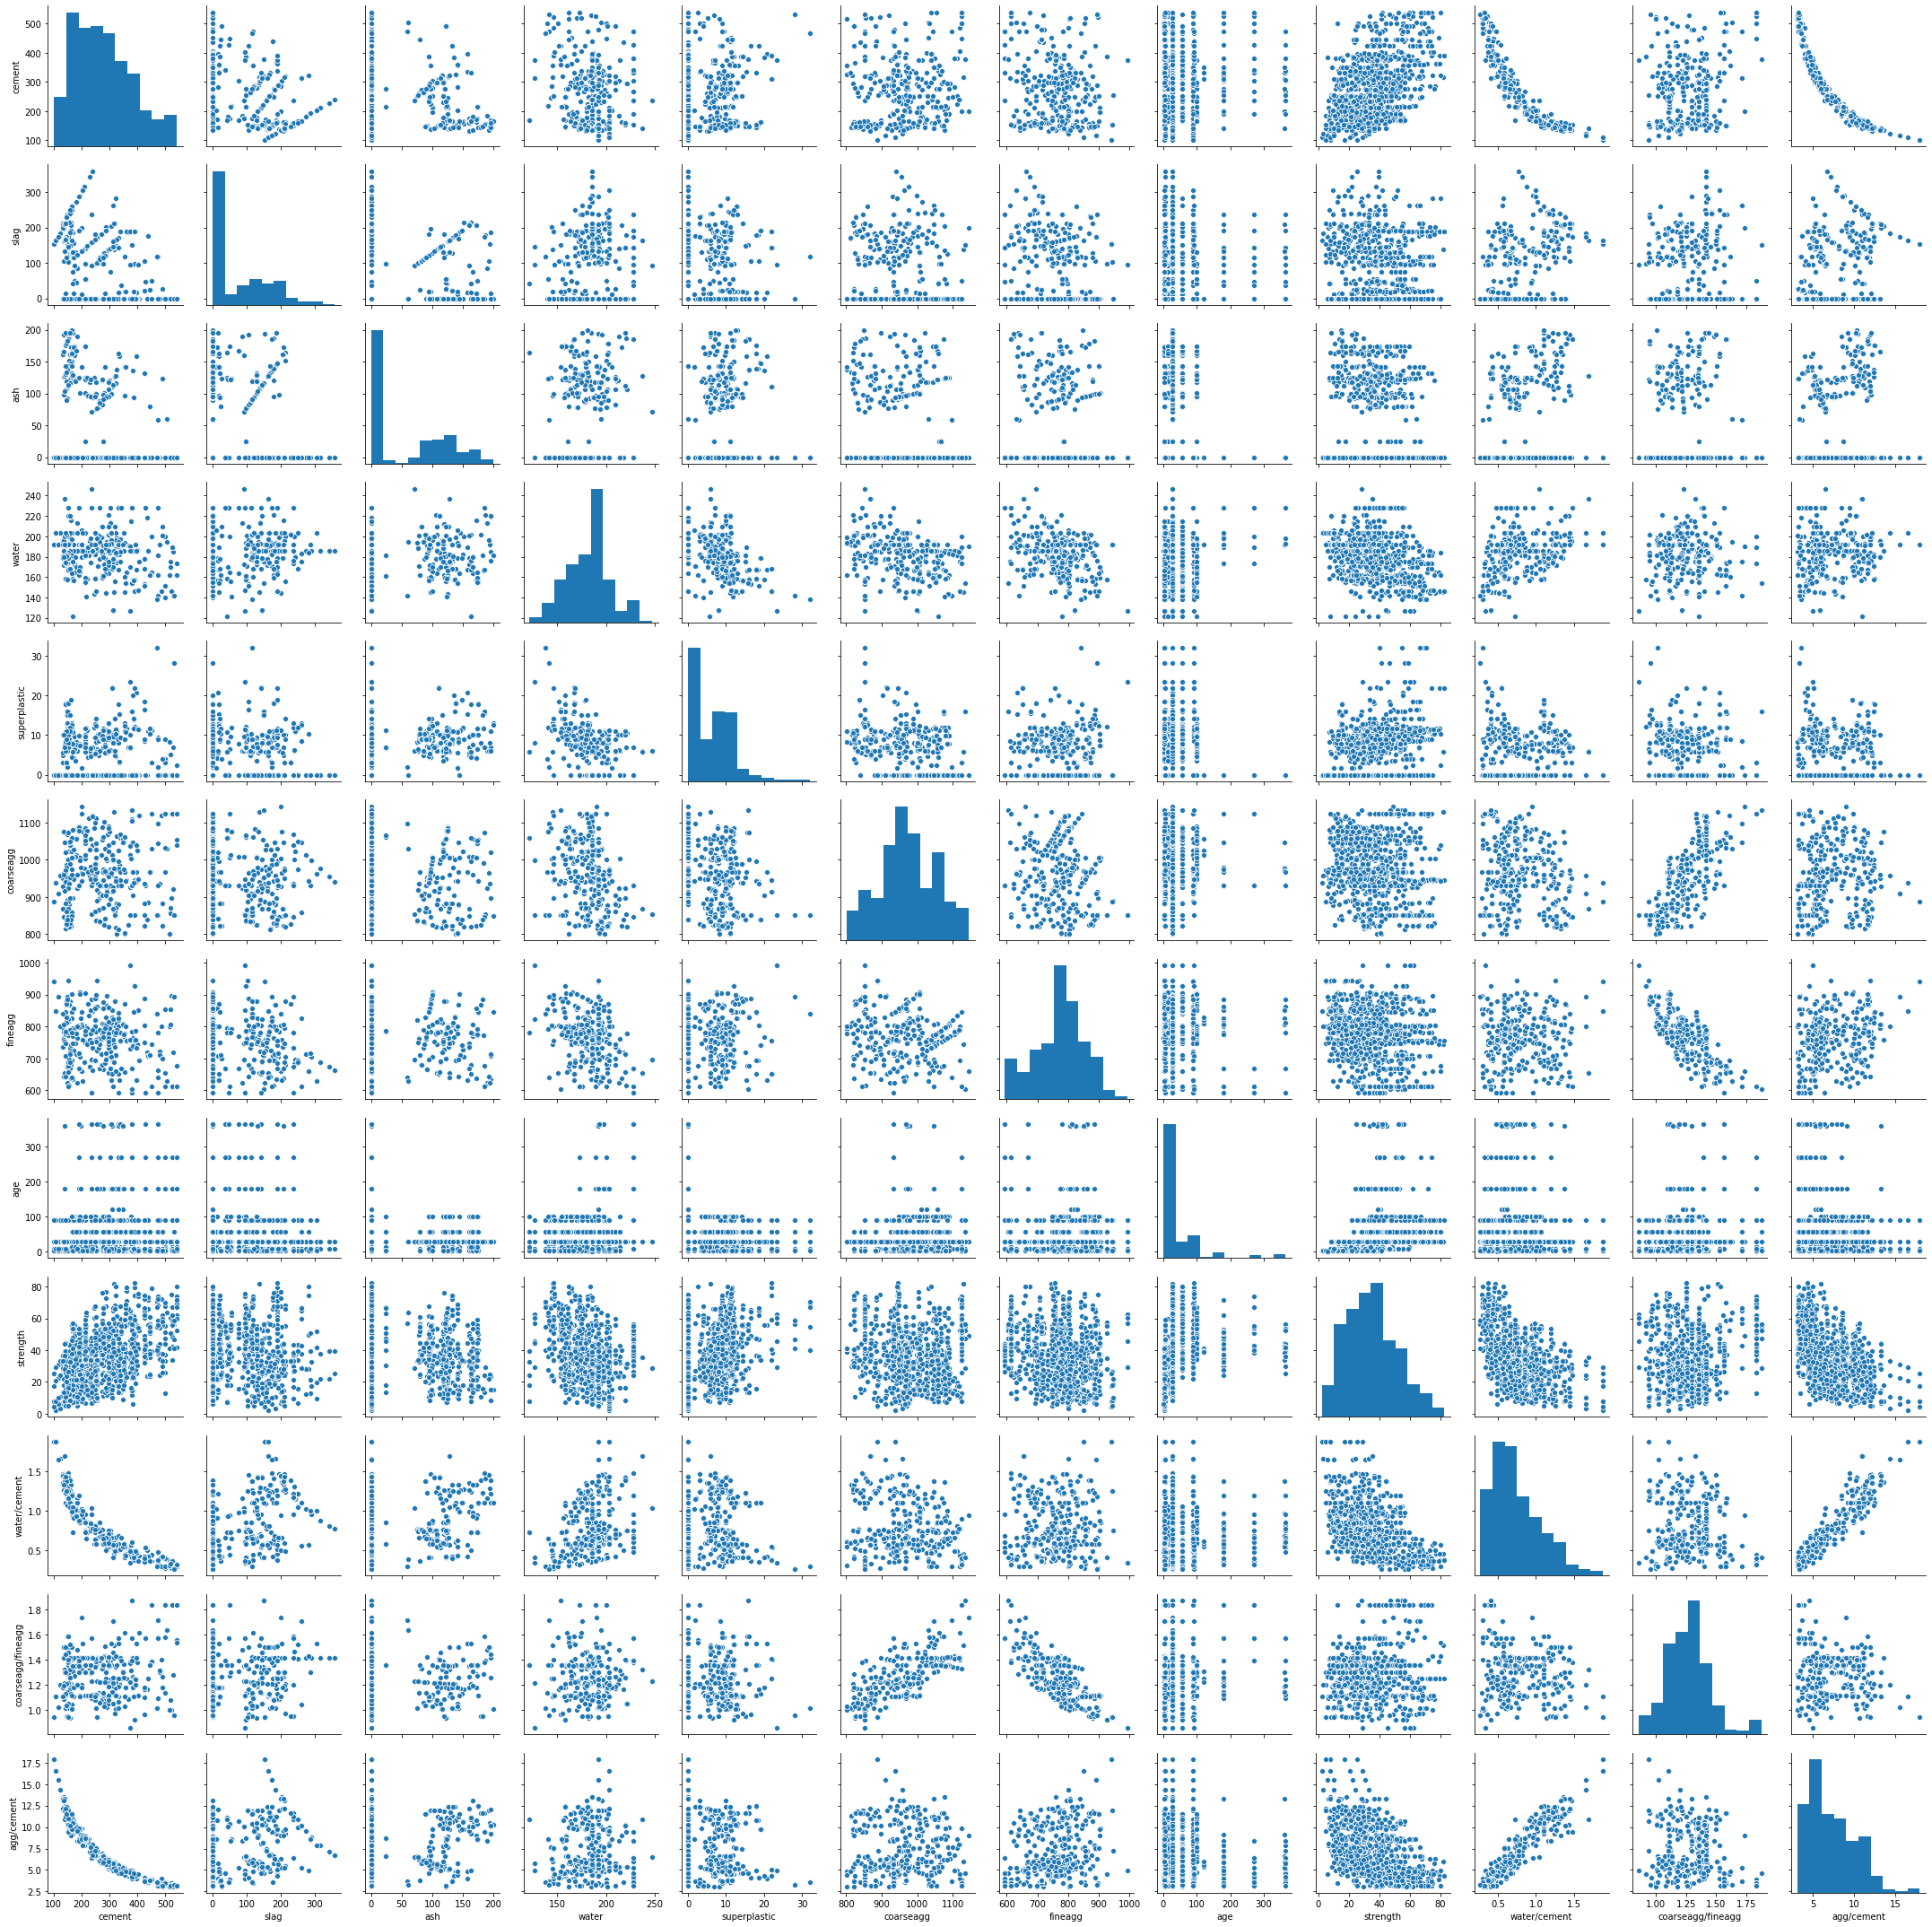

In [40]:
sns.pairplot(data) #Paitplot for all the columns is displayed using pairplot function from seaborn package. 

#### Inference on relationship between indepednent attributes:
1. The plots indicate that there is no much linear relationship between the predictors and almost they are independent.
2. In most of the plots indicated that for both higher and smaller values pne independent variable higher values of other independent variables occur.
3. Their plots also indicate less chance of multicollinearity between the independent attributes we can aslo chech when we do correlation matrix.
4. There are large entry of records with zero values and the plot between independent values show there are many outliers in their non-linear relationship.
5. There is strong relationship between the ratio attributes and respective independent attributes, these independent attributes can be dropped and hold their ratios for building the model. 

#### Inference on relationship between strength vs indepednent attributes:
1. The scatter plot of the stength vs cement indicates that the plot is lightly hetroscadastic but as the volume of cement increses the the compressive strenght of the concrete also increases.
2. Other attributes vs the strength do not show much correlation or they are tough to identify as good predictor in this dimension, it is needed chech wheteher they can exist as good predictor in the higher degree atleast.
3. Let us also check the influence of the predictors on the strength in the below pair plot.
4. The ratio attributes, water/cement agg/cement have some relationship with the strength.

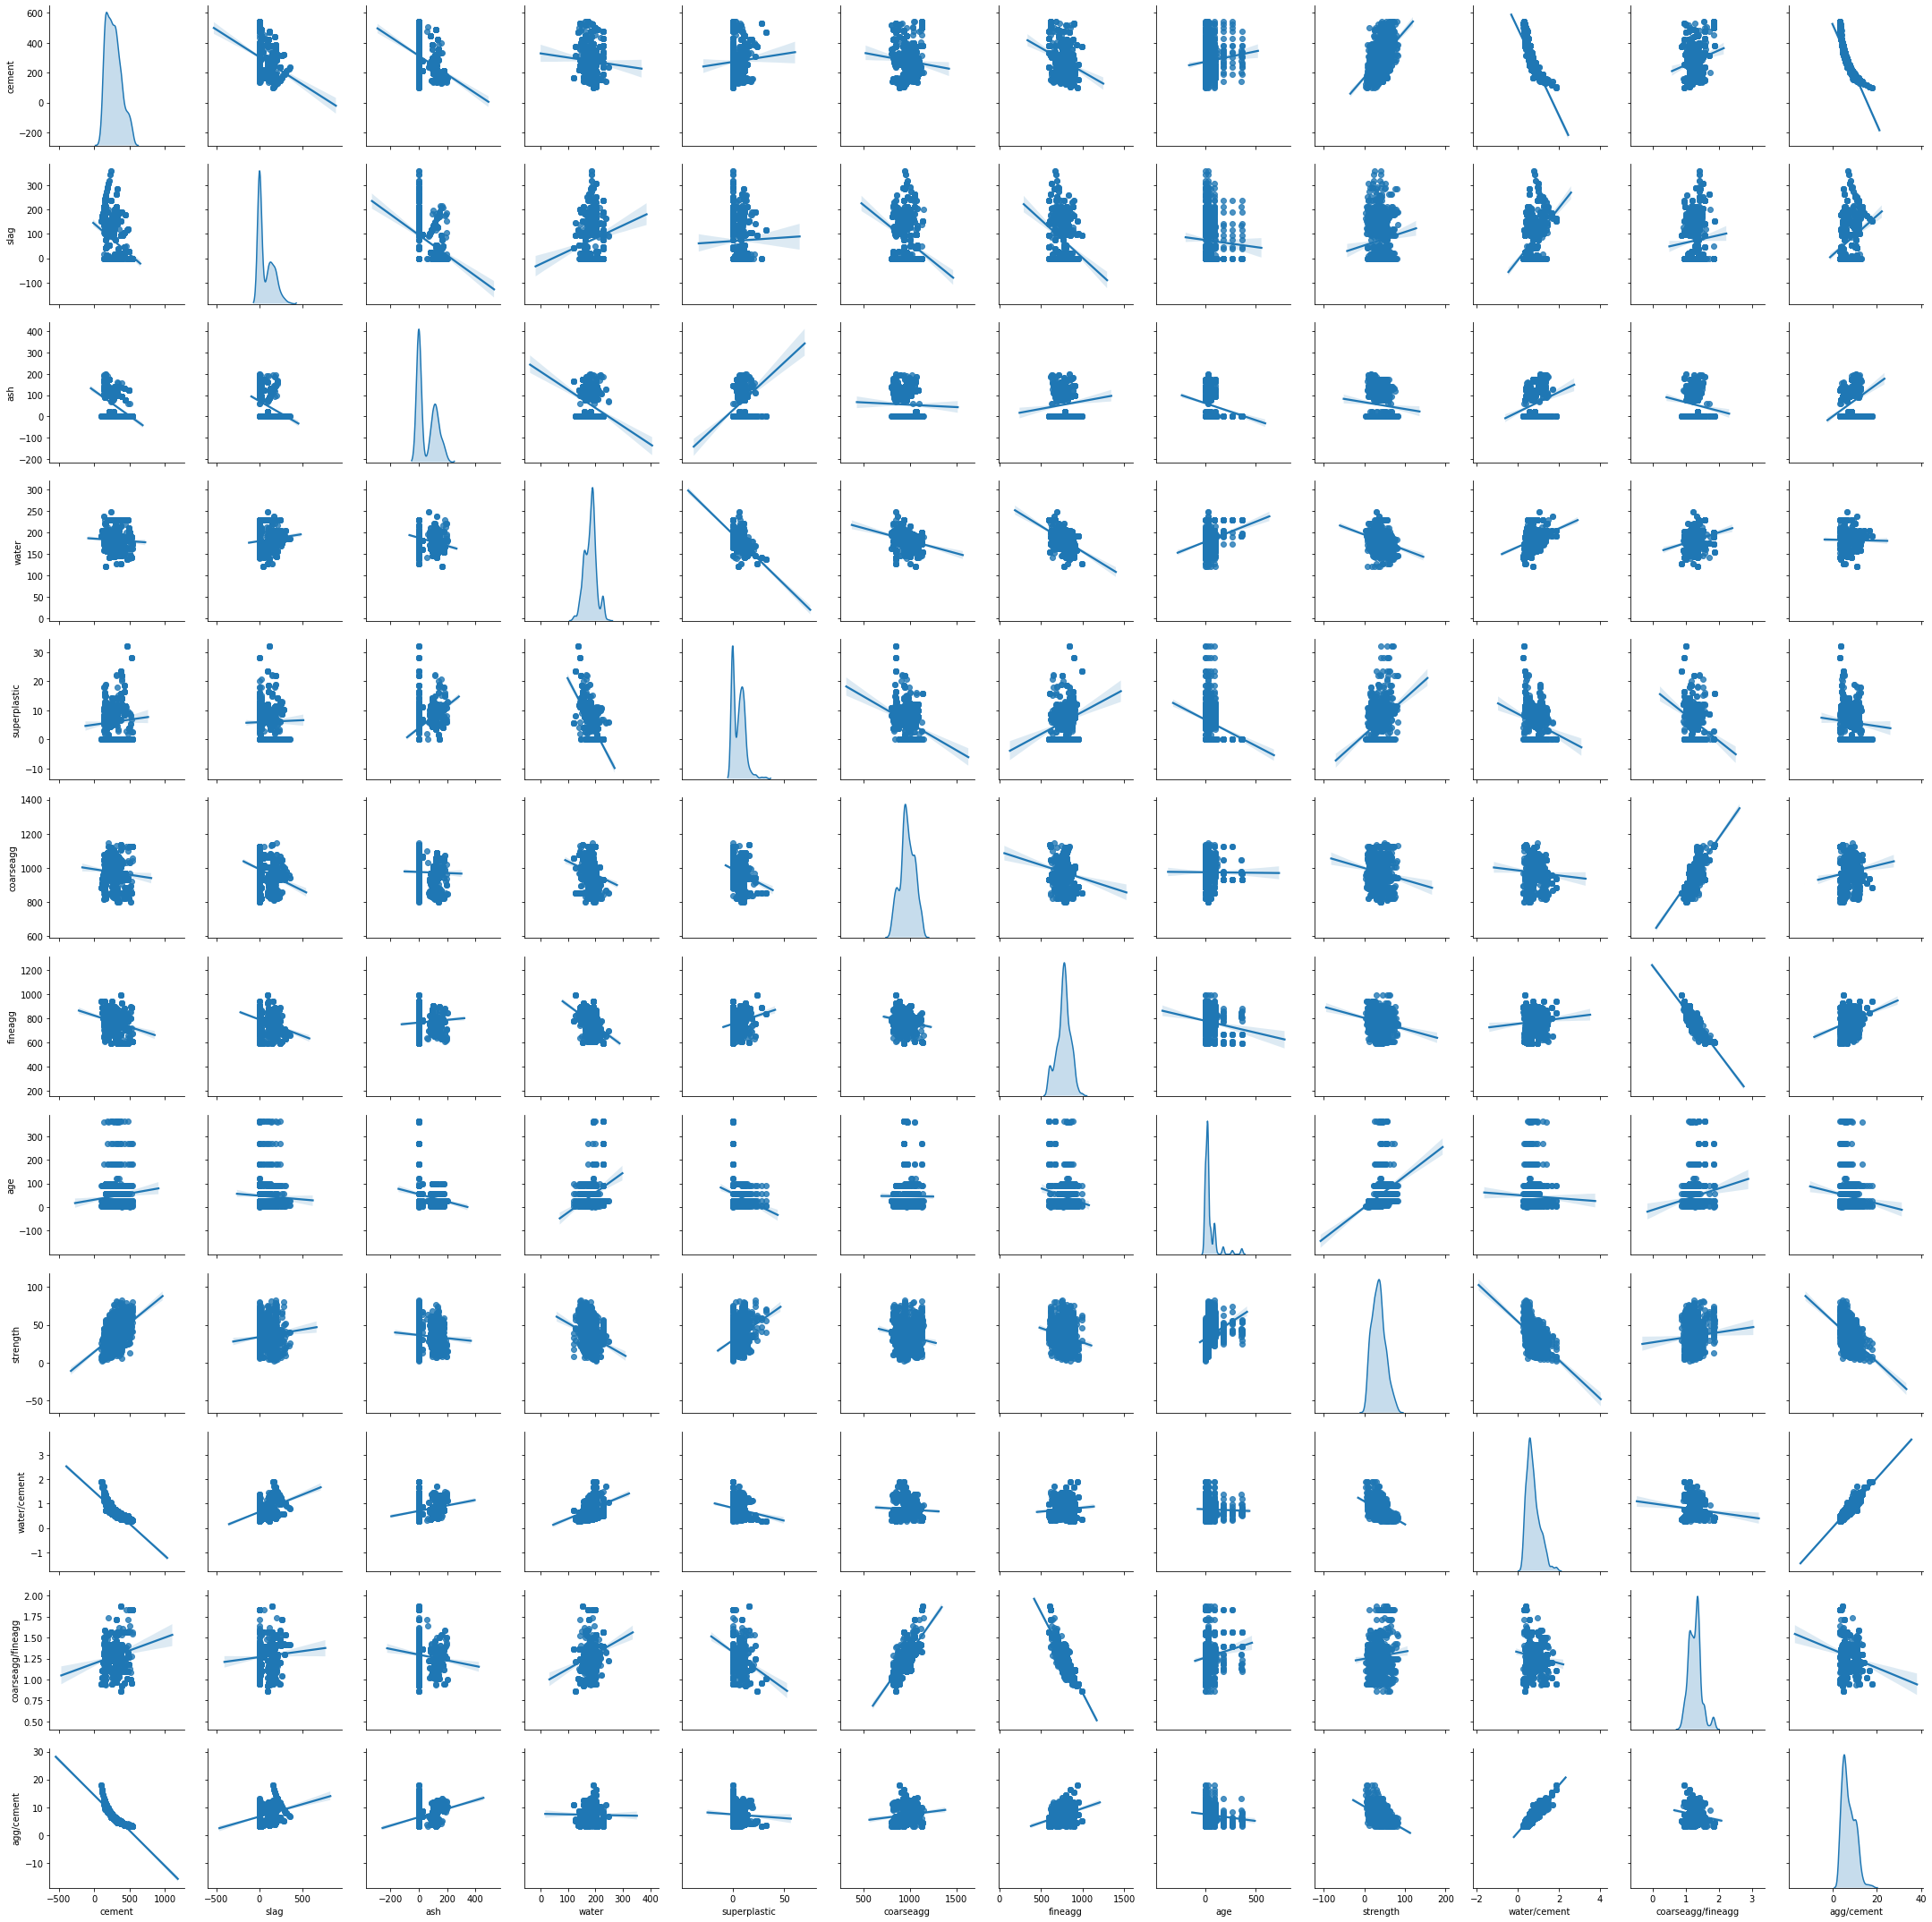

In [41]:
sns.pairplot(data, kind='reg',diag_kind = 'kde')  #Paitplot for all the columns is displayed using pairplot function from seaborn package.

##### Inference on the strength vs other predictors:
1. The best filt lines of plots Stenght vs cement, water, superplastic  and age show some strong influence on the dependent variable.

2. The best filt lines of plots Stenght vs Other attributes are either horizontal or vertical  indicating much less influence.

##### Other Inference on the strength vs other predictors:
1. Viewing the distribution plots on different dimenstions we can see there can be mostly  four to five clusters.
2. We can do cluster analysis and find the predictors seperately influencing ecah cluster and build seperate models for each cluster.

## Correlation heatmap:
##### Note: 
 Below a Correlation heat map is used here to get the idea on the attributes that are correlated to each other, so that the attributes that are highly correlated can be obtained and trails on improving the accuracy of the model by doing some feature engineering on those correlated features. 

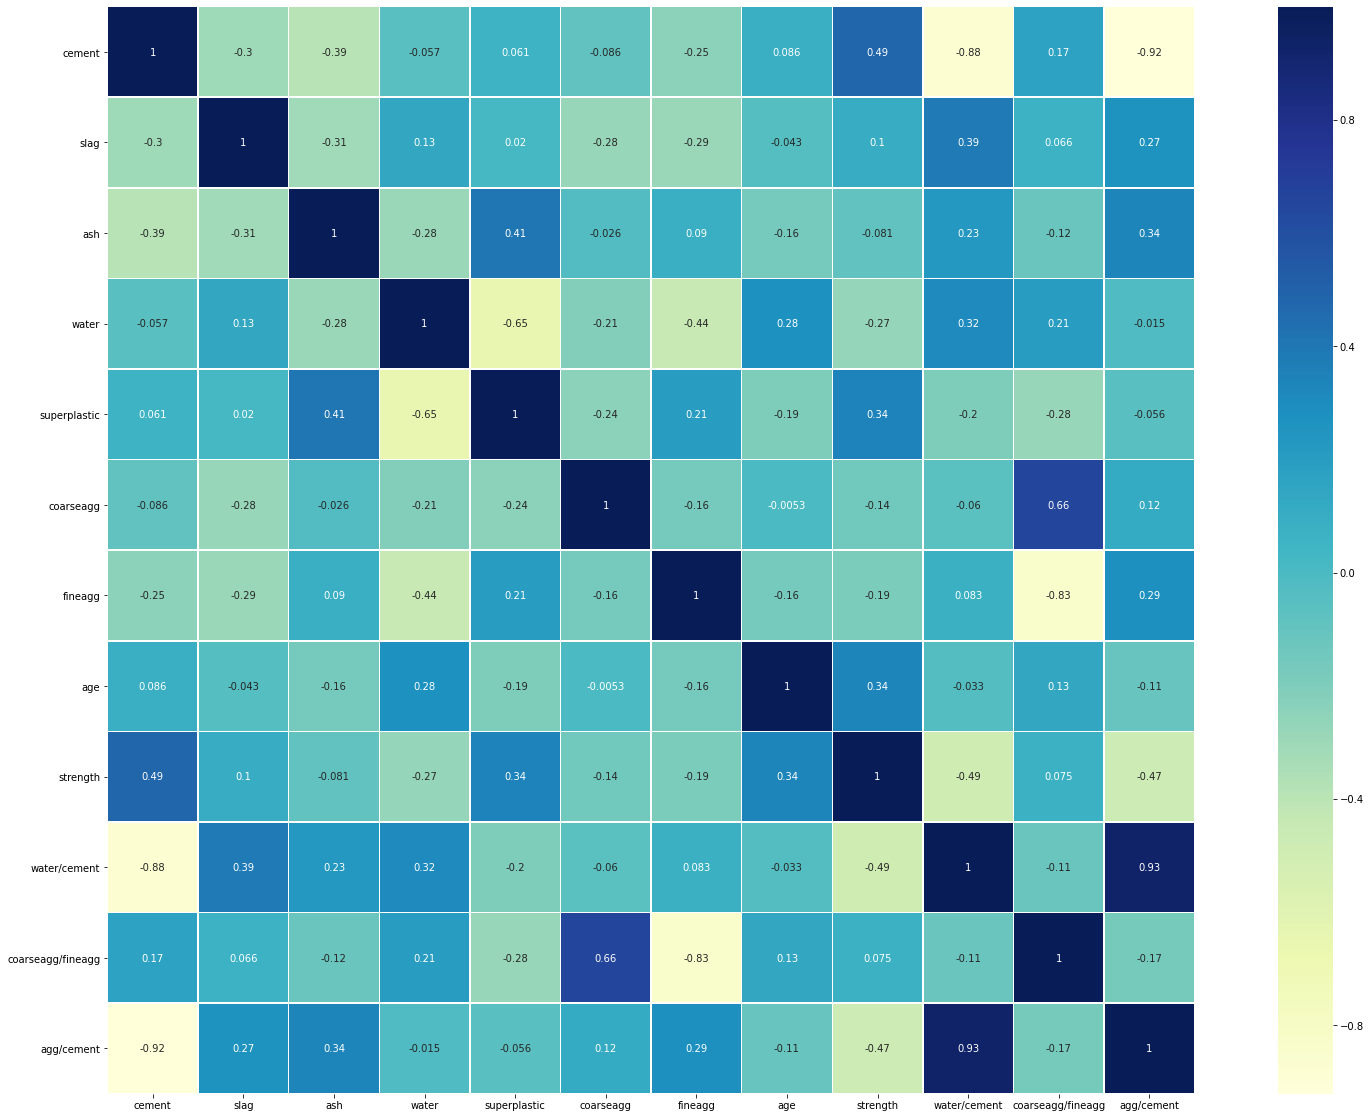

In [42]:
corr=data.corr() #This function gives the correlation between the features.
plt.subplots(figsize =(30, 20))# Here subplot function is used to give the shape of the each box in the heatmap.
sns.heatmap(corr, linewidths=.5, square=True,cmap="YlGnBu",annot=True) #Using this function we can have the visualization of the correlation between the features.

##### Inference on the above outputs:
1. As seen in the pairplot and in the above correlation heatmap also idicated theat there is no much correaltion between the dependent and independent variable.

2. Also, there is no much correlation between the independent variables indicating much lower multicollinearity between predictors.

3. But, there is strong negaive correlation between the ratio variables and respective independent variables.

    Therefore, upon doing the univariate, bivariate and mutivariate analysis for the selection of the good predictors a clear decision on the selection of predictors cannot be taken due to the reasons mentioned under the each category. But,few variables like 'ash' , 'coarseagg' , 'fineagg' and  'superplastic' seems to be very poor predictors for the dependent attribute than other predictors. Finally this leads to the need for undergoing someother feature selection techniques 

===================================================================================================================

# Data Preprocessing (Part- 2):

 Data Preprocessing involves:
 1. Data Imputation (shown above in DP_Step:1).
 2. Outlier Detection and Cleaning Process (DP_Step:2).

#### DP_Step 2: Outlier Detection and Elemination:
  Outliers can be detected in the following methods:
  
  1. Visualization Techniques:
       
       a. Box Plot.
       
       b. Scatter Plot.
       
       
  2. Non - Visualization Techniques:
      
      a. Z-score
      
      b. IQR.

Outlier correction methods:

1. Data Clipping  - Making the outliers close to the whiskers or near to the x-std-dev.

2. Identifying the reason for the outliers like the outlier is a typo error or rare occurence, if it is sue to typo error we can cooreect it but in the case of rare occurrence based on the domain knowledge we can either hold or drop it.

3. Data Capping Making the outliers equal to the median.

4. Extreme method is outlier elemination method.

Outlier elemination methods:
 
  1. Z-Score.
  2. IQR

#### a.: Outlier Detection:

Here Outlier is detected using Boxlot visual representation:

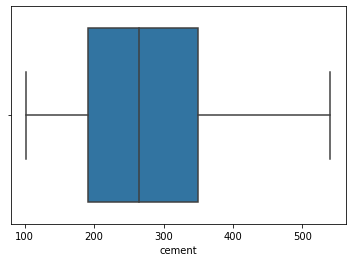

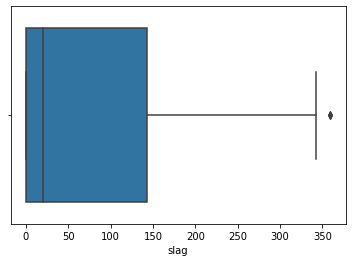

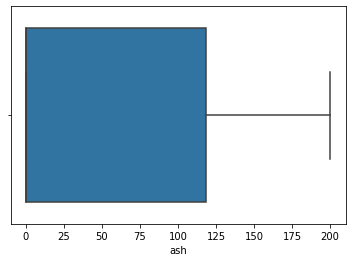

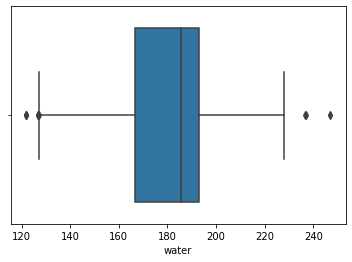

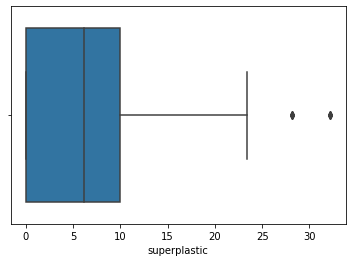

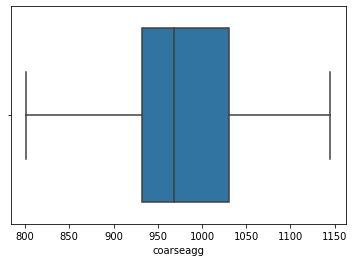

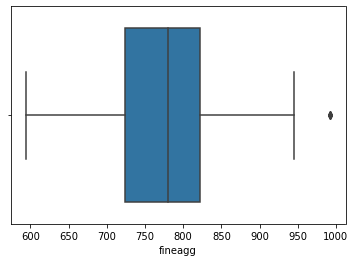

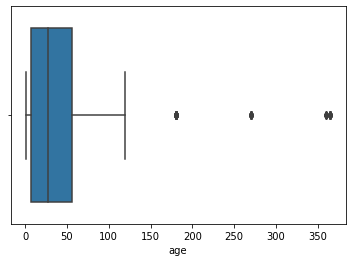

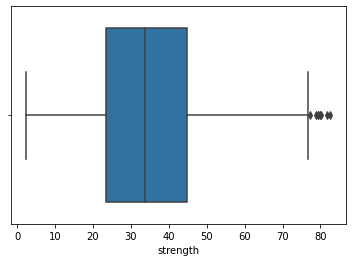

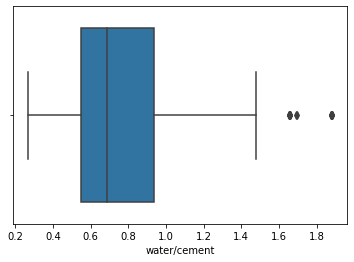

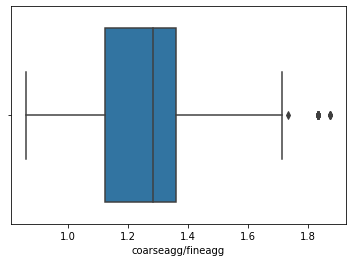

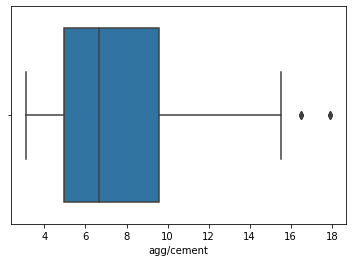

In [43]:
col = data.columns

for column in col:
    sns.boxplot(data[column]) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
    plt.show()


In [56]:
# Claculating the Quantiles for the attributes:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
# Calculating the IQR:
IQR = Q3-Q1

# Obtaining the data with outliers:
data_1 = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

# fetching the index of the outlier rows
data_1.index

Int64Index([  33,   44,   50,   51,   63,   64,   66,   75,   81,   93,
            ...
             957,  971,  985,  990,  995, 1003, 1017, 1026, 1028, 1029],
           dtype='int64', length=134)

In [57]:
# Obtaining the data without qoutliers:
data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

# fetching the index of the outlier rows
data1.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1016, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1027],
           dtype='int64', length=871)

##### Inference on the above output:
1. It can be seen that form above plot there are many features with outliers.
2. The outliers here are assumed that they are because of random occurence and mixing up of gaussians.
3. There are 134 records that are outliers.

#### b.: Outlier treatment:

   Here the outlier treatment strategy used is - Data Clipping: making all the outlier records equal to their nearest whisker's end.


In [59]:
col = data.columns
for column in col:
# Calculating the quantiles:
    Q1_ = data[column].quantile(0.25)
    Q2_ = data[column].quantile(0.50)
    Q3_ = data[column].quantile(0.75)
# Calculating the IQR:
    IQR_ = Q3_-Q1_
#Extracting the outliers above and below the whiskers:
    outliers_up = (data[column] > (Q3_ + 1.5 * IQR_))
    outlier_down = (data[column] < (Q1_ - 1.5 * IQR_))
#Clipping the outliers to the nearest whisker ends:
    data[outliers_up] = (Q3_ + 1.5 * IQR_)
    data[outlier_down] = (Q1_ - 1.5 * IQR_)

In [61]:
#Extracting the non-outlier data:
data_2 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

# fetching the index of the outlier rows
data_2.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1016, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1027],
           dtype='int64', length=853)

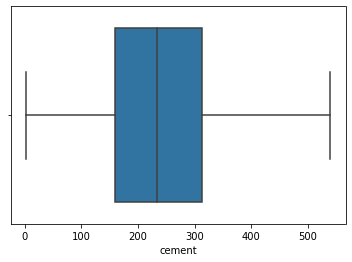

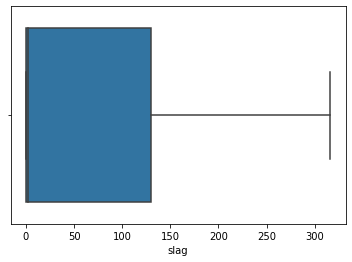

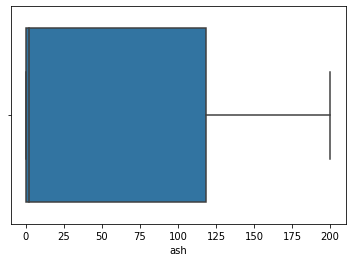

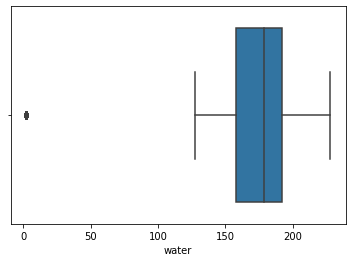

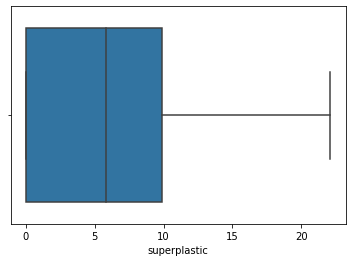

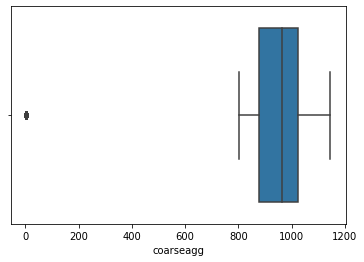

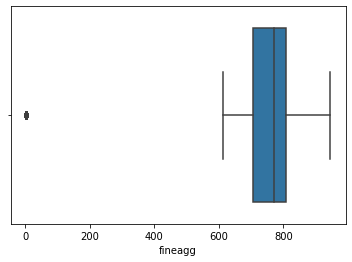

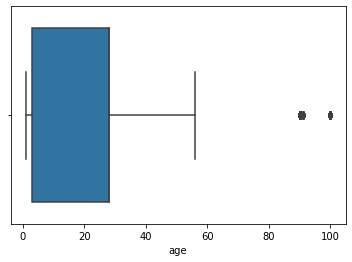

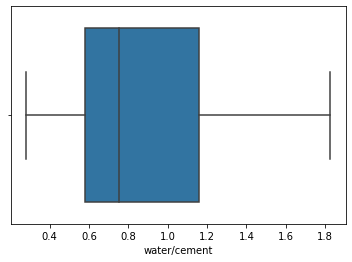

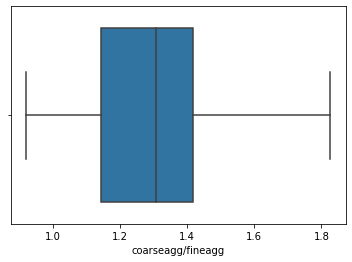

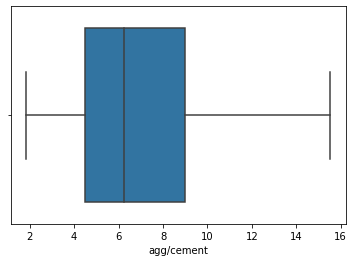

In [205]:
for column in col:
    sns.boxplot(data[column]) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
    plt.show()


#####  Inference on the above output:
1. Outliers were treated using clipping method.
2. After the outlier treatment it was found that number of outliers increased than the number of outliers before treatment.
3. The outlier treatment gave rose to many new extreme outliers.
4. Trials of treating the outlier to the central values was also carried which too gave a large number of outliers (not shown here).
5. In order to avoid the risk of getting overfitting or any other effect on model performance it was decided to use data along with the outliers for further model building process because dropping of these outliers may requier some domain knowledge.

==================================================================================================================

# Data Splitting and Normalizing:

#### Step 1: Seperating the data into Predictors and Labels:
 We will create the two set of independent attributes x and x_1 for only orginal attributes and with new attributes respectively 
1. x, x_1 is for predictors.
2. yis label with class output.

In [5]:
x_1 = data.drop('strength',axis=1) #Extracting the predictors along with new one.
x = data.drop(['strength','water/cement', 'coarseagg/fineagg', 'agg/cement'],axis=1) #Extracting the predictors only orginal one.
y = data['strength']    #Extracting the dependent variable.
x_col = x.columns    #  Extracting the column names.
x_1col = x_1.columns    #  Extracting the column names.

In [6]:
#Training and production dataset for orginal predictors alone
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2) # Splitting the data Cross Validation and x_test, y_test will be used for production.
#Training and production dataset for orginal predictors with new one
x_1train, x_1test, y_1train, y_1test = train_test_split(x_1, y, test_size=0.3, random_state=2) # Splitting the data Cross Validation and x_test, y_test will be used for production.

In [7]:
#Converting the labels in the form of series:
y_train, y_test = y_train.to_frame(), y_test.to_frame()
y_1train, y_1test = y_1train.to_frame(), y_1test.to_frame()

##### Inference on the above steps:
  The data is seperated into label and feature and again split into train and test samples with 70:30 proportions respectively, so now we can train and test the model. 

#### Step 2: Nullifying the effect of different units of attributes:

There are few features with large scale which may suppress the other features so they need to be Normalized or scaled. Any data with attributes of different scales can be standardized using following methods:

        1. MinMaxScaler  - makes use of mininmum and maximum values of the data and gets affected by outlier but maintains the shape of the data. It gives Range from 0 to 1.
        
        2. StandardScaler - makes use of the mean and standard deviation of the data and aslo gets affectsd by outlier with implication of scaling. It dose not maintain the exact shape of the data.
        
        3. Robustscaler -Makes use of min and IQR of the data, it gives very high loss of data so it does not gets affected by outliers also does not maintain the shape of the data.
        
        With among three types, standard scaler is used for our analysis and model building purposes becuse of the advantage of normalizing the data along with implication of scling also among other two its range is much acceptable. 
    

##### Normalizing the data as whole and splitting:
  Here data as a whole is normalized without splitting into training and testing data but it is not a right procedure to do so because splitting the data after normalizing will lead to leakage of test data into training data. 

In [8]:
scale = StandardScaler()  # in built normalizing function availble in sklearn. 

data_col = data.columns    #  Extracting the column names.

data_sc = pd.DataFrame(scale.fit_transform(data)) #Normalizing the training features.
data.columns = data_col 

xd = data.drop(['strength','water/cement', 'coarseagg/fineagg', 'agg/cement'],axis=1) #Extracting only orginal predictors.
yd = data['strength']    #Extracting the dependent variable.


x_traind, x_testd, y_traind, y_testd = train_test_split(xd, yd, test_size=0.3, random_state=2) # Splitting the data Cross Validation and x_test, y_test will be used for production.
#Training and production dataset for orginal predictors with new one

##### Inference on the above output:
The data as a whole is standardized and split into training and testing data, this is done to do the trial during the model building process.

##### Normalizing the training and testing data containing both orginal and new features:

In [9]:
scale = StandardScaler()  # in built normalizing function availble in sklearn. 

x_train_sc = pd.DataFrame(scale.fit_transform(x_train)) #Normalizing the training features.
x_train_sc.columns = x_col                            #Assigning the normalized training features with the original data's feature name. 

x_test_sc = pd.DataFrame(scale.fit_transform(x_test)) #Normalizing the test features.
x_test_sc.columns = x_col                           #Assigning the normalized testing features with the original data's feature name.

x_1train_sc = pd.DataFrame(scale.fit_transform(x_1train)) #Normalizing the training features.
x_1train_sc.columns = x_1col                            #Assigning the normalized training features with the original data's feature name. 

x_1test_sc = pd.DataFrame(scale.fit_transform(x_1test)) #Normalizing the test features.
x_1test_sc.columns = x_1col                           #Assigning the normalized testing features with the original data's feature name.

y_train_sc = pd.DataFrame(scale.fit_transform(y_train)) #Normalizing the training features.
y_test_sc = pd.DataFrame(scale.fit_transform(y_test)) #Normalizing the training features.

y_1train_sc = pd.DataFrame(scale.fit_transform(y_1train)) #Normalizing the training features.
y_1test_sc = pd.DataFrame(scale.fit_transform(y_1test)) #Normalizing the training features.

##### Inference on the above steps:
  All training and testing data are standardized without any data leakages.

##### Building thepolynomial features and Normalizing the training and testing data containing both orginal and new features:
     But usage of polynomial features leads to the combination of the orginal features which are in reality the physical components. Therefore we may do this theoretically but the feasibility in real time should be taught of and we also need some practical subject knowledge to decide on building the model with the polynomial features. But here to do the theoretica test  polynomial features are built.

In [10]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
scale = StandardScaler()  # in built normalizing function availble in sklearn. 

x_train_sc = pd.DataFrame(scale.fit_transform(x_train)) #Normalizing the training features.
x_train_scp = pd.DataFrame(poly.fit_transform(x_train_sc))


x_test_sc = pd.DataFrame(scale.fit_transform(x_test)) #Normalizing the test features.
x_test_scp = pd.DataFrame(poly.fit_transform(x_test_sc))


x_1train_sc = pd.DataFrame(scale.fit_transform(x_1train)) #Normalizing the training features.
x_1train_scp = pd.DataFrame(poly.fit_transform(x_1train_sc))


x_1test_sc = pd.DataFrame(scale.fit_transform(x_1test)) #Normalizing the test features.
x_1test_scp = pd.DataFrame(poly.fit_transform(x_1test_sc))


In [11]:
pd.DataFrame(x_1test_scp)

0         1         2         3         4         5         6   \
0    1.0 -0.046228  0.278454 -0.415548 -0.962283  0.798989  1.047455   
1    1.0  0.275884  0.799089 -0.815751 -0.620317  0.604645 -0.780835   
2    1.0  1.395418 -0.598527  1.340445 -0.140614  0.361714 -1.925688   
3    1.0 -0.156217  0.442743  0.605378 -0.140614  0.604645 -0.834171   
4    1.0 -0.091402 -0.853060  0.647849  0.842538  0.701817 -0.569974   
..   ...       ...       ...       ...       ...       ...       ...   
297  1.0 -1.118624 -0.365977  1.859892 -2.809850 -0.091756  1.010245   
298  1.0  0.958407  0.896274 -0.815751 -1.285251  1.560172  1.947957   
299  1.0 -1.148085 -0.853060  1.529929 -0.815048 -1.014892  0.351613   
300  1.0 -0.313345 -0.853060 -0.815751  0.049367 -1.014892  1.522513   
301  1.0  0.914215  0.232175 -0.815751 -2.581873  2.774825 -1.552339   

           7         8         9   ...        57        58        59  \
0    0.102004 -0.530562 -0.518137  ... -0.054120 -0.052852  0.039021   
1    0.361929 -0.329539 -0.642986  ... -0.119270 -0.232715 -0.260053   
2   -0.290905  0.072507 -1.041980  ... -0.021093  0.303117  0.269094   
3   -0.351353 -0.329539 -0.225128  ...  0.115784  0.079099  0.103979   
4   -0.143413 -0.329539 -0.029454  ...  0.047260  0.004224  0.042167   
..        ...       ...       ...  ...       ...       ...       ...   
297  0.072989  0.704294 -0.042252  ...  0.051406 -0.003084  0.028042   
298 -2.043886 -0.631074 -1.088751  ...  1.289843  2.225282 -6.090616   
299  1.533404 -0.688509  0.834762  ... -1.055763  1.280026 -1.263010   
300  0.555361 -0.631074 -0.032424  ... -0.350474 -0.018007  0.169731   
301  2.642013  0.575065 -1.311286  ...  1.519330 -3.464433 -5.590454   

           60        61        62        63        64        65        66  
0   -0.017999  0.274904 -0.202961  0.093618 -0.198207  0.091425 -0.067499  
1   -0.203928  0.211889  0.236781  0.185678  0.461998  0.362289  0.404849  
2    0.350048 -0.075551 -0.067071 -0.087248  0.963856  1.253822  1.113088  
3    0.114809  0.074189  0.097524  0.107681  0.066624  0.073564  0.096702  
4    0.047332  0.009706  0.096894  0.108762  0.008660  0.009721  0.097042  
..        ...       ...       ...       ...       ...       ...       ...  
297  0.096344 -0.029758  0.270580  0.929645 -0.016233 -0.055771  0.507113  
298  1.835514  0.687082 -1.880550  0.566737 -3.244389  0.977754 -2.676120  
299  2.349771 -0.574741  0.567100 -1.055064 -0.687563  1.279179 -1.262174  
300  0.100858  0.020462 -0.192870 -0.114608 -0.009910 -0.005889  0.055503  
301 -2.063119 -0.754075 -1.216828 -0.449062  2.774658  1.023969  1.652348  

[302 rows x 67 columns]

##### Inference on the above steps:
  1. The Training and testing datas were appended with polynomial features. 
  2. All training and testing data are standardized without any data leakages.
  3. The polynomial features were created with all the orginal data seperately and new data seperately without dropping any features.
  3. The polynomial features were built using all the features because in the above feature analysis it was not possible classify the predictors as good and bad so to make further feature analysis which is based on the wrapper method.

###### Visualizing the effect of Normalization:

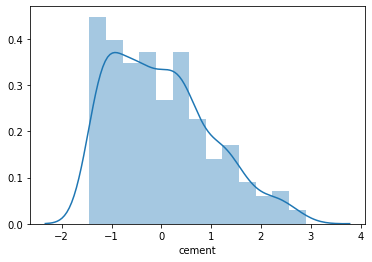

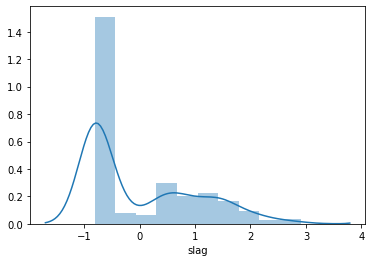

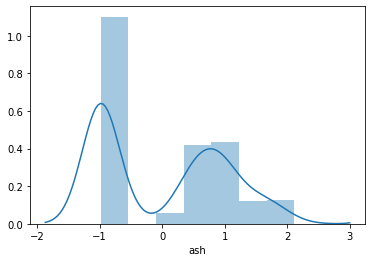

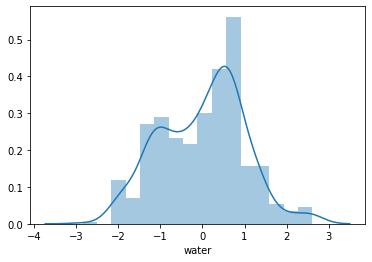

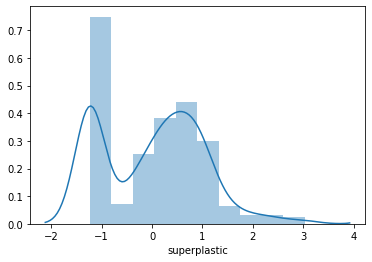

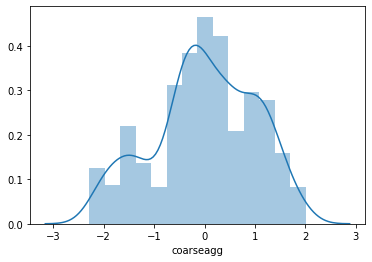

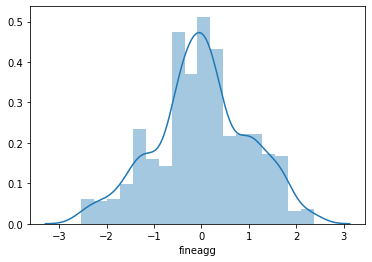

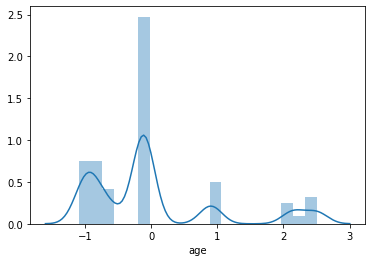

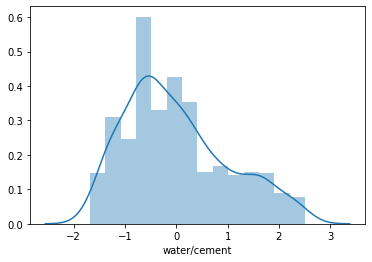

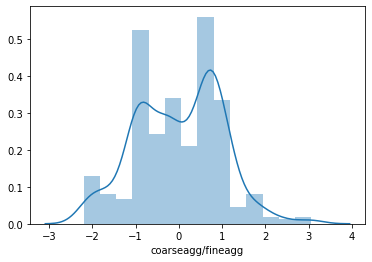

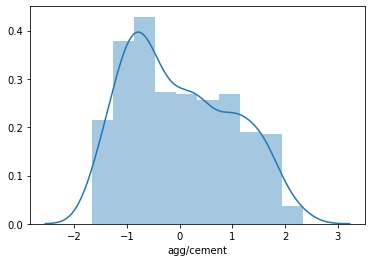

In [213]:
x_train_sc_col = x_train_sc.columns
for col in x_train_sc_col:
    sns.distplot(x_train_sc[col])
    plt.show()

##### Inference on the outputs:
      Therefore the effect of different attributes are removed by normalizing the all attributes. Which is also evident in the above plots.

==================================================================================================================

# 2. Deliverable -2 (Feature Engineering techniques) (15 marks)

# Feature Selection:

There are large number of feature selection methods:
1. Cluster analysis
2. Sequential Forward Feature Selction
3. Sequential Forward Floating Feature Selction
4. Sequential Backward Floating Feature Selction
5. Sequential Backward  Feature Selction
6. Recursive Feature Elemination Method.
7. Multicollinearity analysis
8. P-Value anlysis
9. Varaince analysis
10. Featuretools - Auto Feature Engineering method.
11. Genetic algorithm methods.
12. Feature fitering using statistical methods.

     Being said the availability of various feature selection methods here we will use cluster anlysis method and Sequential forward seleection technique.

## Step 1: Cluster analysis for orginal features:

### Introduction:
  Here cluster analysis is done to explore whether the data can be split into groups and identify the right predictors for each group and create model for each group. Initally let us do cluster analysis for the given orginal attributes alone.

### a. K-Means Cluster analysis:
 Initially KMeans algorithm is trained with training data for various number of vluster that was determined during pair plot analysis to analyse in which number of cluster the sum of within cluster variance is minimum.

In [93]:
cluster_range = range( 2, 10) # expect 4 to 5 clusters from the pair panel visual inspection hence restricting from 2 to 15.
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5) # Building the model.
  clusters.fit(x_train_sc)                     # Training the model.
  cluster_errors.append( clusters.inertia_ )   # Appending the within cluster variance to the empty list created above.

# Displaying the within cluster cariance in DataFrame:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

num_clusters  cluster_errors
0             2     3882.024859
1             3     3367.780028
2             4     2925.957885
3             5     2617.499603
4             6     2408.319728
5             7     2293.349677
6             8     2093.957652
7             9     1977.418686

##### Inference on the above output:
1 . Thus a list of sum of within clusters variance is obtained for various number of clusters

### b. Creatind the elbow plot to decide the number of cluster:
   The plot for the number of clusters vs sum of withing clusters variation is minimum.

Text(0, 0.5, 'Inertia or Sum of Within-cluster sum-of-squares')

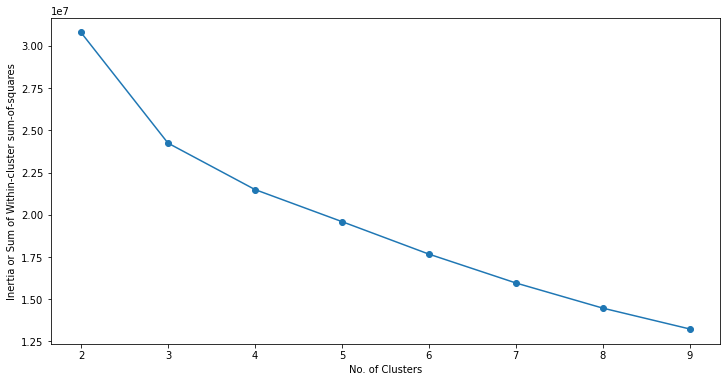

In [76]:
plt.figure(figsize=(12,6))

plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia or Sum of Within-cluster sum-of-squares')

##### Inference on the above output:
    To avoid overfitting it is optimal to choose no. of clusters at the elbow because going beyond may cause overfitting and going below have drastic drop of the variance. Based on this it can be seen that the number of clusters at the elbow is 3 but we will go with 4.

### c.Building the model:
  The model is built using K-means algorithm for number of cluster decided above.

In [98]:
#Creating the model and training:
cluster = KMeans( n_clusters = 4, random_state = 1)
cluster.fit(x_train_sc)
prediction=cluster.predict(x_train_sc)
x_train_sc["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

x_train_sc_copy = x_train_sc.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

##### Inference on the above output:
  Model is created, trained and the data is seperated into the clusters of five.

### d. Analyzing the possibility of existence of distinct groups:
   We analyze the availability of distinct groups using by visual analysis using the box plot.

In [100]:
#Centroids of all the clusters:
centroids = cluster.cluster_centers_ # Using the methods available in the K-Means clustering fetching the centroid of the group.
centroid_df = pd.DataFrame(centroids, columns = list(x_col))
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  0.995213  0.120971 -0.009145 -0.519193      0.880047  -0.937159  0.062002   
1 -0.586089 -0.652467  0.981486 -0.524186      0.478593   0.566336  0.443685   
2  0.744677 -0.771840 -0.938348  0.624191     -1.135576   0.433183 -0.024856   
3 -0.728006  1.260547 -0.462836  0.612481     -0.487224  -0.187969 -0.568424   

        age  
0 -0.141137  
1  0.264154  
2 -0.075086  
3 -0.137264

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002BF1F09088>,
      dtype=object)

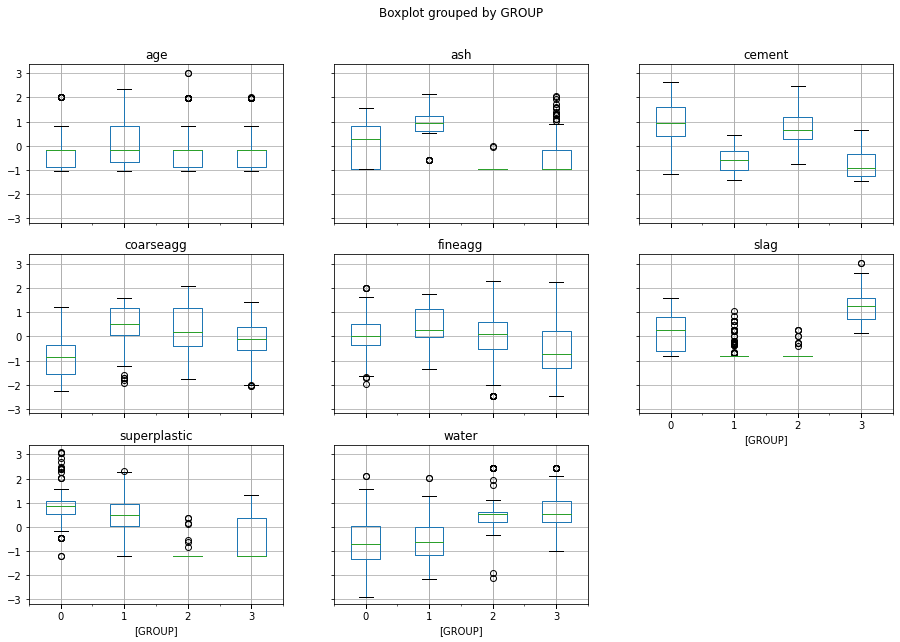

In [101]:
#Visualizing the groups in terms of boxplot:
x_train_sc_copy.boxplot(by = 'GROUP', figsize=(15, 10))

#### Inference on the above output:
1. There are no distinct groups visible in either of the plots.
2. Let us try again after outlier treatment. 

#### 1.Outlier Treatment:
  Methodology: Capping - Converting all the outliers. to the median 

In [104]:
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers_up = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers_up] = group.median()       
    return group

x_train_sc_copy_corrected = (x_train_sc_copy.groupby('GROUP').transform(replace)) 
concat_data = x_train_sc_copy_corrected.join(pd.DataFrame(x_train_sc_copy['GROUP']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002BF0B84B88>,
      dtype=object)

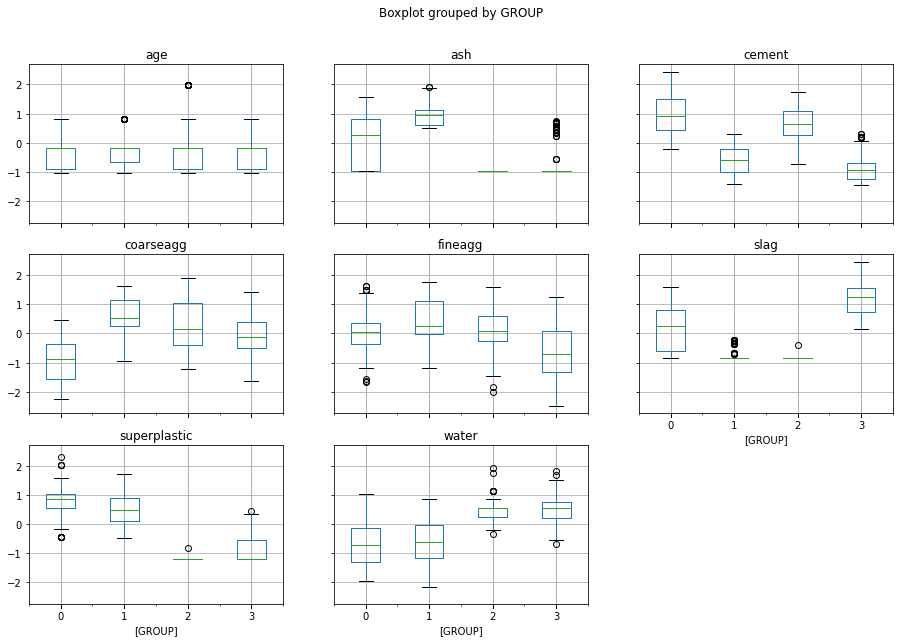

In [105]:
concat_data.boxplot(by = 'GROUP', figsize=(15, 10)) #Visualizing again the boxplots.

#### Inference on the above output:
    There are no distinct groups visible in either of the plots even after treating the outliers. Predictors except cement, superplastic and water others seem to be week predictors.
    
#### Scatter plot Visualization:
 Through this we can visualize the clusters as scatter plots and understand whether distinct groups are avialable or not simultaneously we can see what are the clusters that contribute for each cluster.

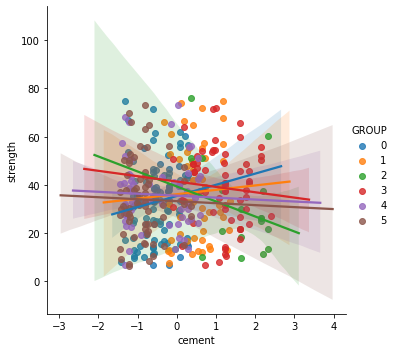

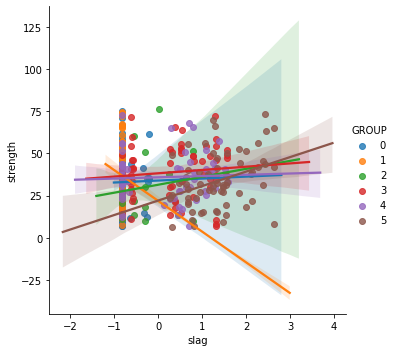

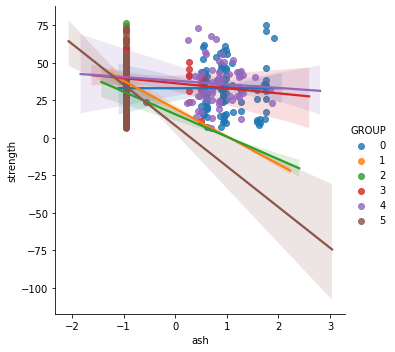

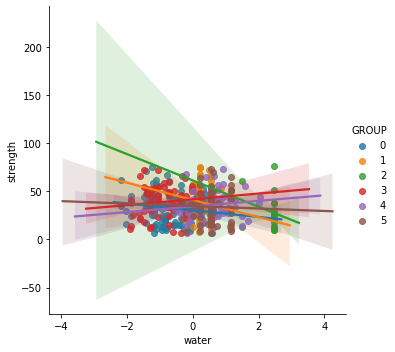

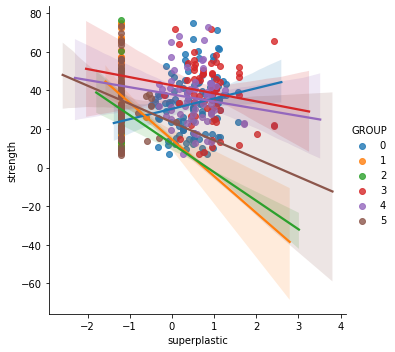

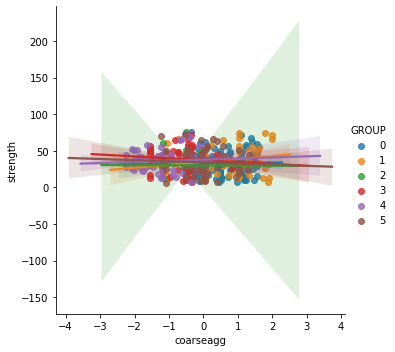

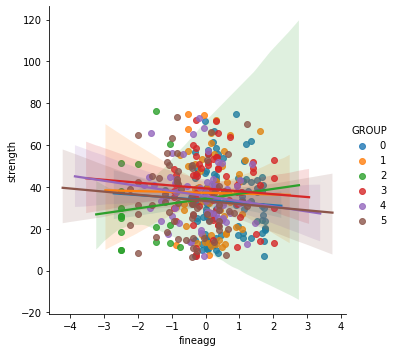

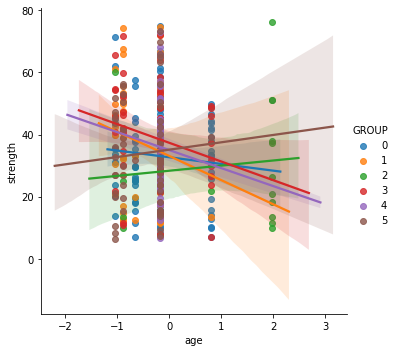

In [97]:
concat_data['strength'] = y_train
# Scatter Plot using the module available in the seaborn:
for column in x_col:
    sns.lmplot(column, 'strength', data = concat_data, hue='GROUP')
    plt.show()

##### Cummulative Inference on the above output: 
1. For each group there are only one or two predictors that can strongly influence the label.
2. Other attributes have their baseline either horizontal or steepy vertical fitting the model will lead to the underfitting and overfitting of the models respectively when developed for each group.
3. The noise of the data is also very high.
4. Therefore, it cant be proceeded to build the model for induvidual groups with very less number of predictors.

### Conclusion:
   Therefore no opportunity was found to split the data into groups and create models using their respective good predictors for the above analysis which was done using only the original attributes.

## Step 2:  Sequential Feature Selection:

### Introduction:

  1. Through Sequential Feature Selection (SFS) we can select the algorithms to build models and respective features for a model simultaneously. Therefore based on the result of this analyis the algorithms that can be used for building the model is decided.
  2. There are four methods in SFS out which here we have used Sequential Feature Forward Selection Technique.
  3. Here the SFS process is carreied out for few models within which the processi carried out for orginal attributes, orginal attributes along with the new attributes and for polynomial attributes 

### 1.SFS With Support Vector Regressor:

##### 1a.For orginal attributes:

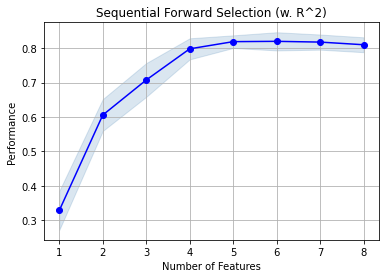

In [217]:
svr1a = SVR() #Support Vector Regressor 
sfs1a = SFS(svr1a, k_features=8, forward=True, scoring='r2', cv=5) #
sfs1a = sfs1a.fit(x_train_sc.values, y_train_sc.values)
fig = plot_sfs(sfs1a.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [213]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7]


In [215]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### Inference on the above output:
1. From the plot it can be understood that we can achieve good performance above 80% eithout overfiiting of the model, if we have very high performance then it means that the model as captured the noise which we dont want.
2. The eight attributes are displayed above.

#### 1aa: For orginal attributes with their polynomial:

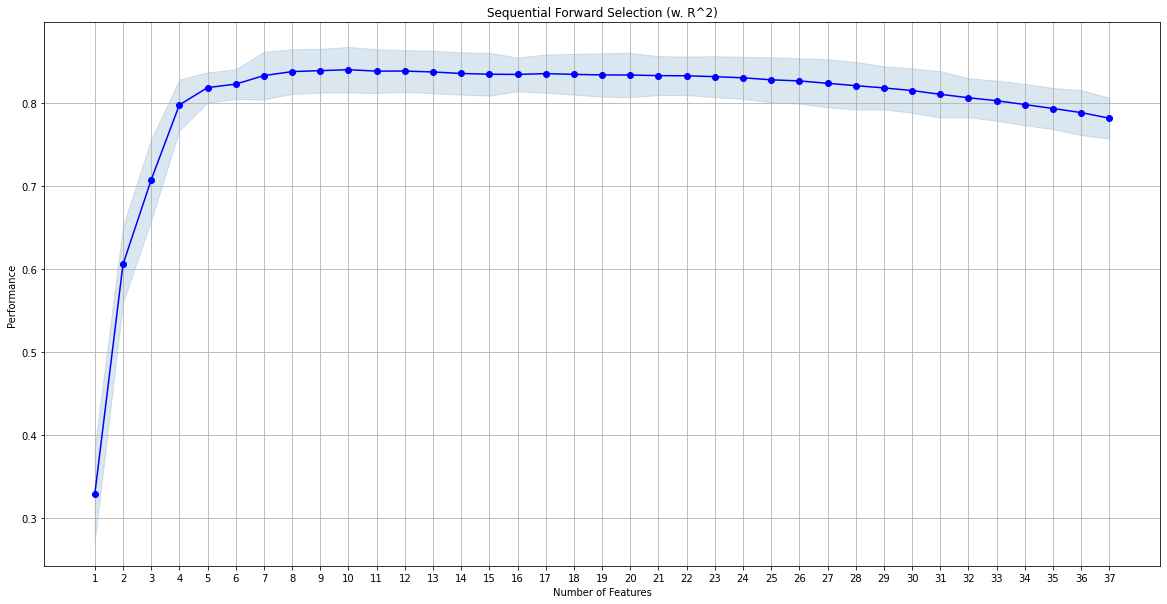

In [33]:
svr = SVR()
sfs1 = SFS(svr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [22]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


##### Inference on the above output:
1. With the Polynomial features also the maximum performance is obtained from eight features.
2. After eight features the performance gradually reduces.

##### 1b. For orginal attributes and new attributes:

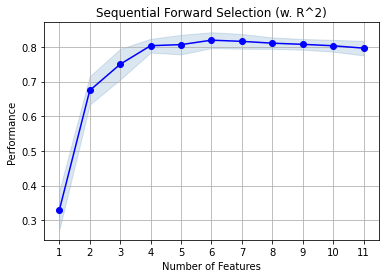

In [46]:
svr = SVR()
sfs1 = SFS(svr, k_features=11, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_sc.values, y_1train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [47]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [48]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water/cement', 'coarseagg/fineagg', 'agg/cement']


#### Inference on the above output:
1. From the plot it can be understood that we can achieve good performance above 80% without overfiiting of the model
2. If we have very high performance then it means that the model as captured the noise which we dont want.
3. The eight attributes are displayed above.
4. Beyond eight attributes the performance is also decreasing gradually.
5. For eight features we have less variance compared to the other features.

#### 1bb. For orginal attributes and new attributes with their polynomial features:

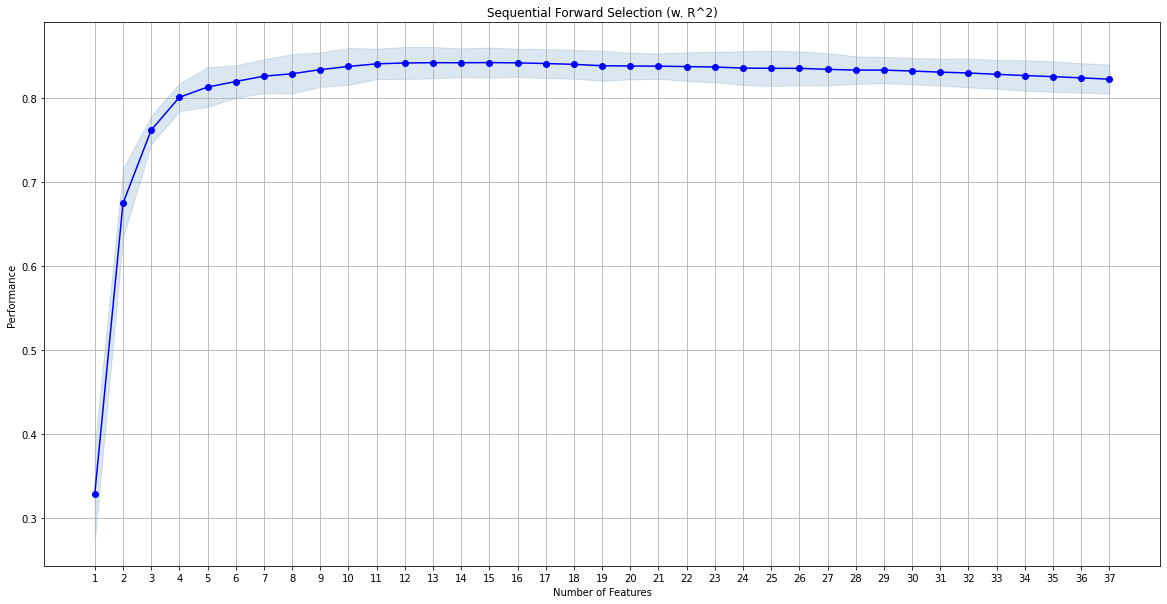

In [44]:
svr = SVR()
sfs1 = SFS(svr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [36]:
columnList = list(x_train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


#### Inference on the above output:
1. In the above plot we can observe that the better performance is achieveable with the polynomial feature of 13 features.
2. The performance achievable with the 13 features is above 80%.

#### Combined Inference:
 Due to the need of domain knowledge for the usage of polynomial features practically and able to achieve better performance with the eight features we can go for building the models on the eight features using SVR algorithm.

##### Note :
 For further process inference is not given for each and ever step only final combined inference is given in order to save time but the decision is taken by carefuuly observing each and every plot clearly.

### 2.SFS LinearRegressor:

##### 2a.For orginal attributes:

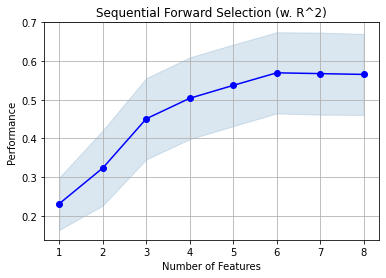

In [218]:
lr = LinearRegression()
sfs1 = SFS(lr, k_features=8, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_sc.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [219]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7]


In [220]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### 2aa: For orginal attributes with their polynomial:

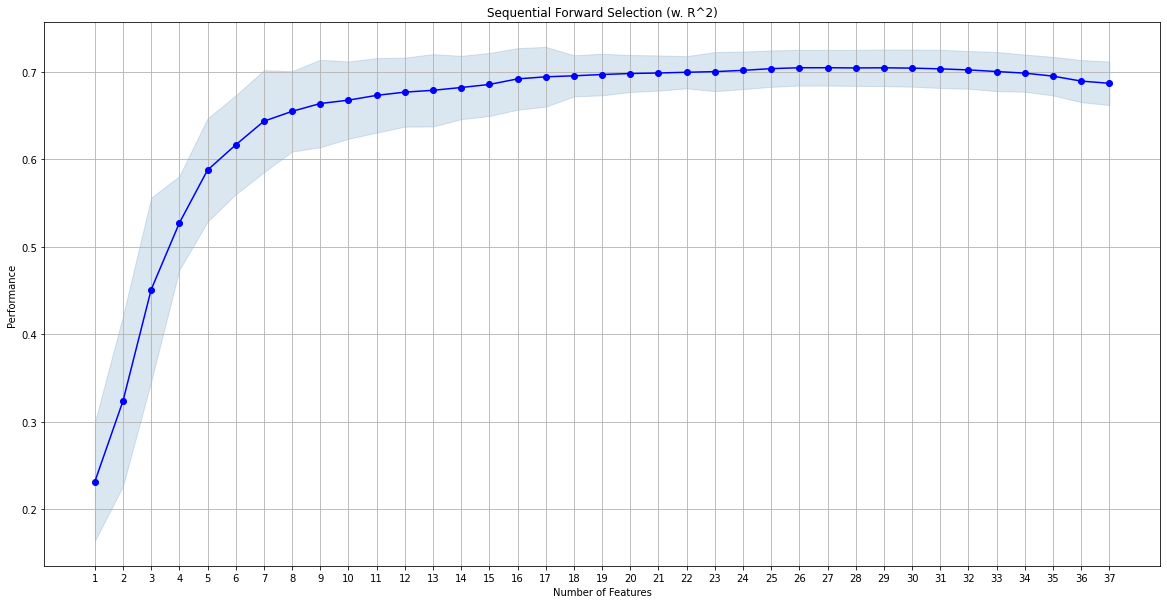

In [35]:
lr = LinearRegression()
sfs1 = SFS(lr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))


plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [36]:
columnList = list(x_train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


##### 2b. For orginal attributes and new attributes:

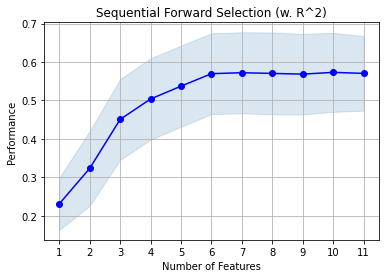

In [52]:
lr = LinearRegression()
sfs1 = SFS(lr, k_features=11, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_sc.values, y_1train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [53]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [54]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water/cement', 'coarseagg/fineagg', 'agg/cement']


#### 2bb. For orginal attributes and new attributes with their polynomial features:

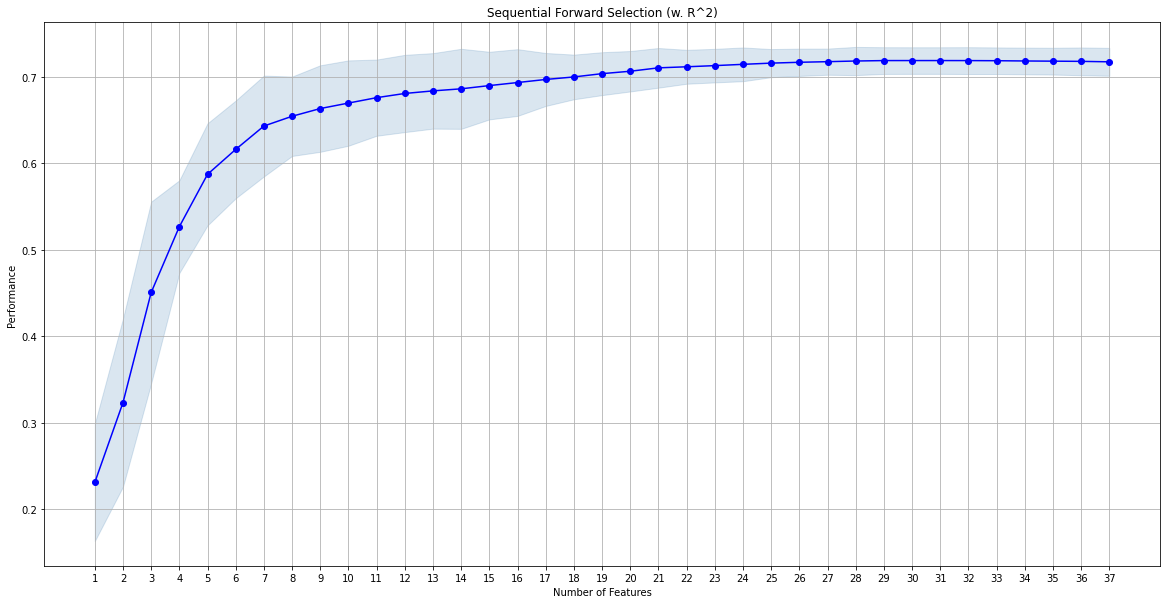

In [45]:
lr = LinearRegression()
sfs1 = SFS(lr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [ ]:
columnList = list(x_1train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

#### Inference on the above plots:
1. From the above plots it can be observed that whatever the number of features is the performnace is just within range of 65-70% .
2. Therefore, it si not better  choise to go with linear regression for building the model.
3. Instead we can try building the model using Lasso or Ridge Regresors.

### 3. KNeighborsRegressor:

##### 3a.For orginal attributes:

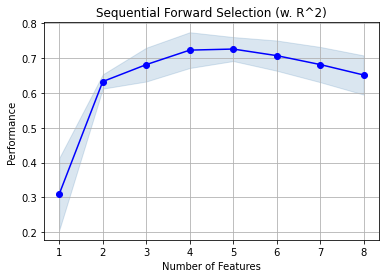

In [242]:
knr = KNeighborsRegressor()
sfs1 = SFS(knr, k_features=8, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_sc.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [219]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7]


In [220]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### 3aa: For orginal attributes with their polynomial:

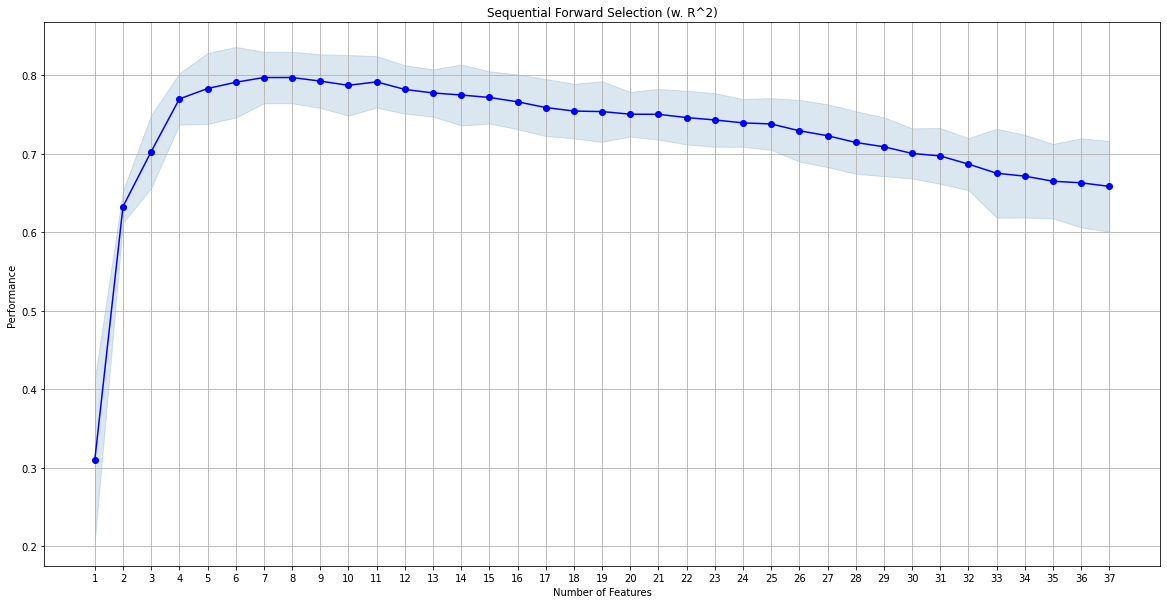

In [37]:
knr = KNeighborsRegressor()
sfs1 = SFS(knr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [38]:
columnList = list(x_train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


##### 3b. For orginal attributes and new attributes:

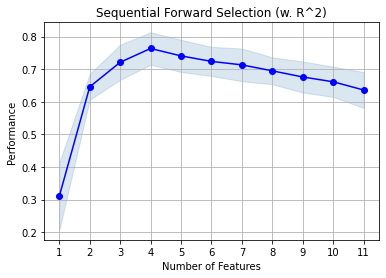

In [56]:
knr = KNeighborsRegressor()
sfs1 = SFS(knr, k_features=11, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_sc.values, y_1train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [57]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [58]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water/cement', 'coarseagg/fineagg', 'agg/cement']


#### 3bb. For orginal attributes and new attributes with their polynomial features:

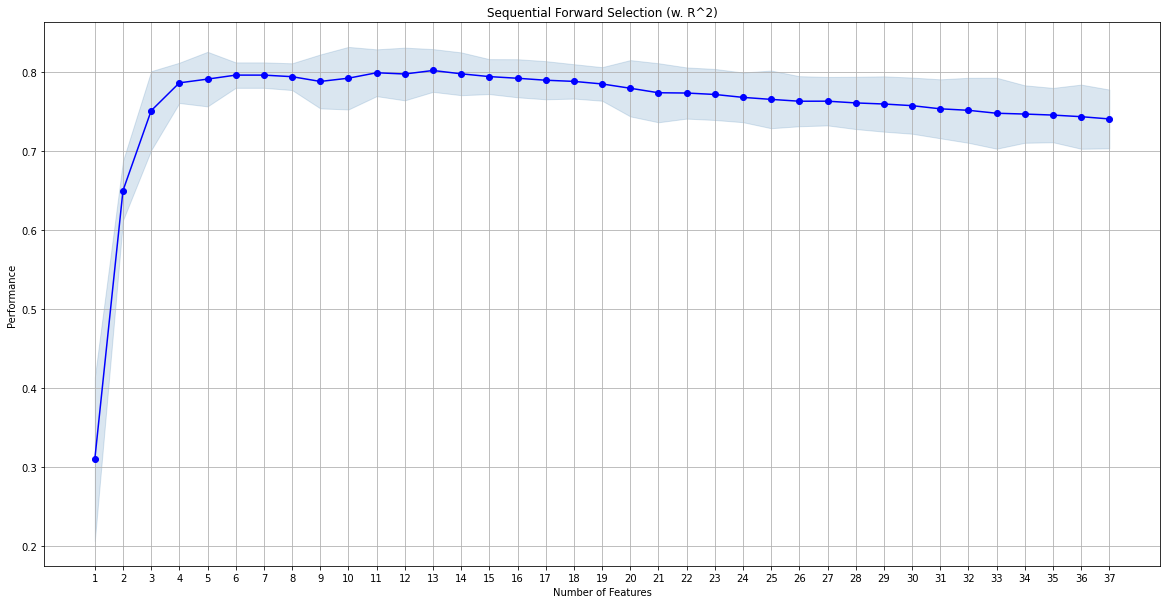

In [46]:
knr = KNeighborsRegressor()
sfs1 = SFS(knr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

##### Combined Inference:
1. Through this we are capable of achieving the performance of about 70-80% with orginal features.
2. Model With other than orginal features performance gradually decreases.
3. So we can further try building the model with orginal features and try improving the performance by hypertuning the parameters 

### Step 4: Sequential Forward Feature Selection - GradientBoostingRegression :

##### 4a.For orginal attributes:

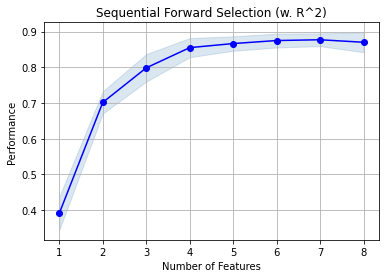

In [252]:
gbr = GradientBoostingRegressor()
sfs1 = SFS(gbr, k_features=8, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_sc.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [253]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7]


In [254]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### 4aa: For orginal attributes with their polynomial:

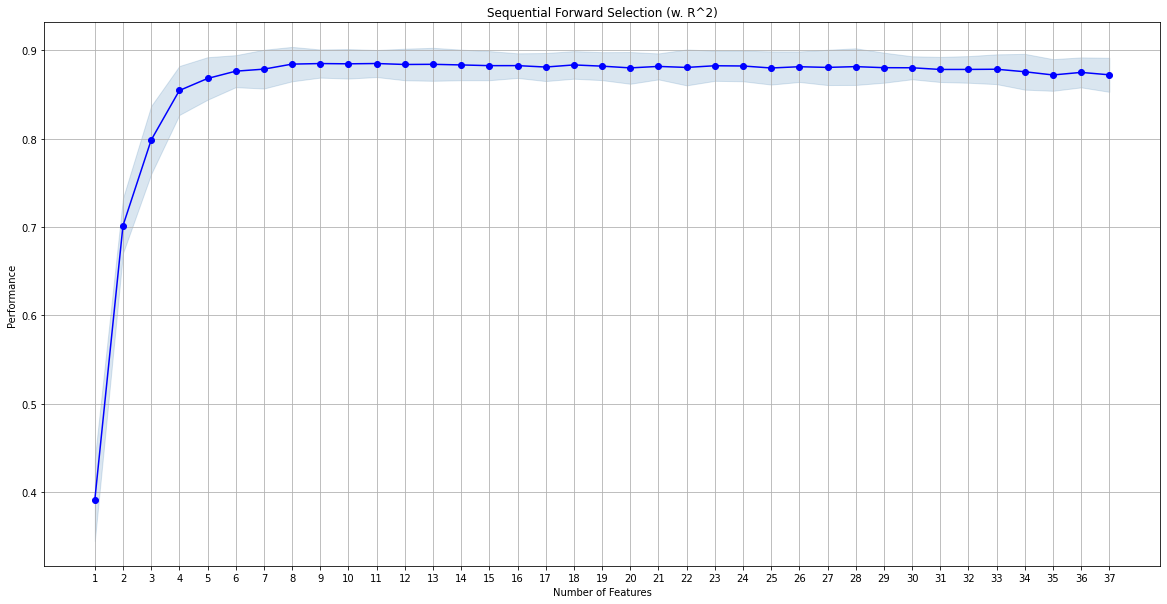

In [40]:
gbr = GradientBoostingRegressor()
sfs1 = SFS(gbr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))


plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

##### 4b. For orginal attributes and new attributes:

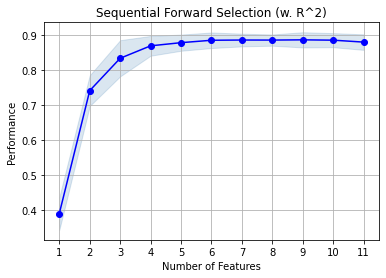

In [59]:
gbr = GradientBoostingRegressor()
sfs1 = SFS(gbr, k_features=11, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_sc.values, y_1train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [60]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [254]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### 4bb. For orginal attributes and new attributes with their polynomial features:

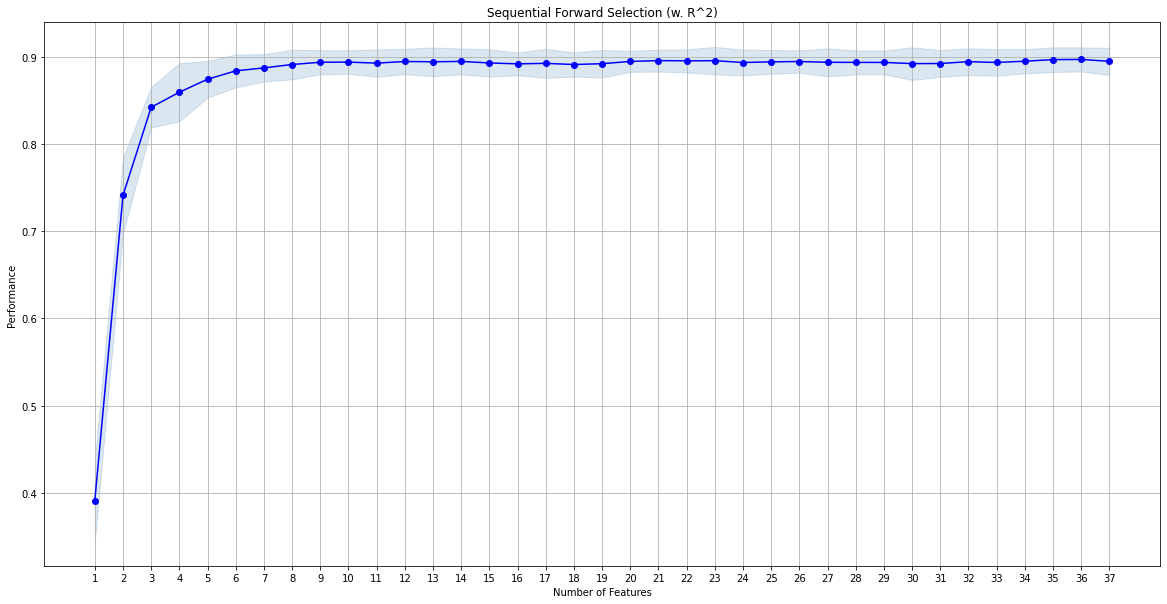

In [47]:
gbr = GradientBoostingRegressor()
sfs1 = SFS(gbr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

##### Combined Inference:
1. Through this we are capable of achieving the performance of about 85-90% with orginal features itself.
2. Model With other than orginal features performance remains the same.
3. So we can further try building the model with orginal features and try improving the performance by hypertuning the parameters 

### Step 5: Sequential Forward Feature Selection - BaggingRegression :

##### 5a.For orginal attributes:

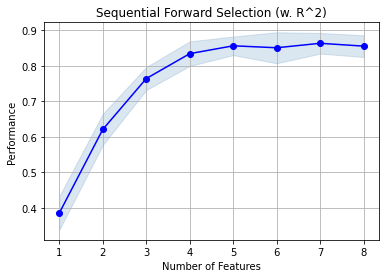

In [256]:
abr = BaggingRegressor()
sfs1 = SFS(abr, k_features=8, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_sc.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [253]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7]


In [254]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### 5aa: For orginal attributes with their polynomial:

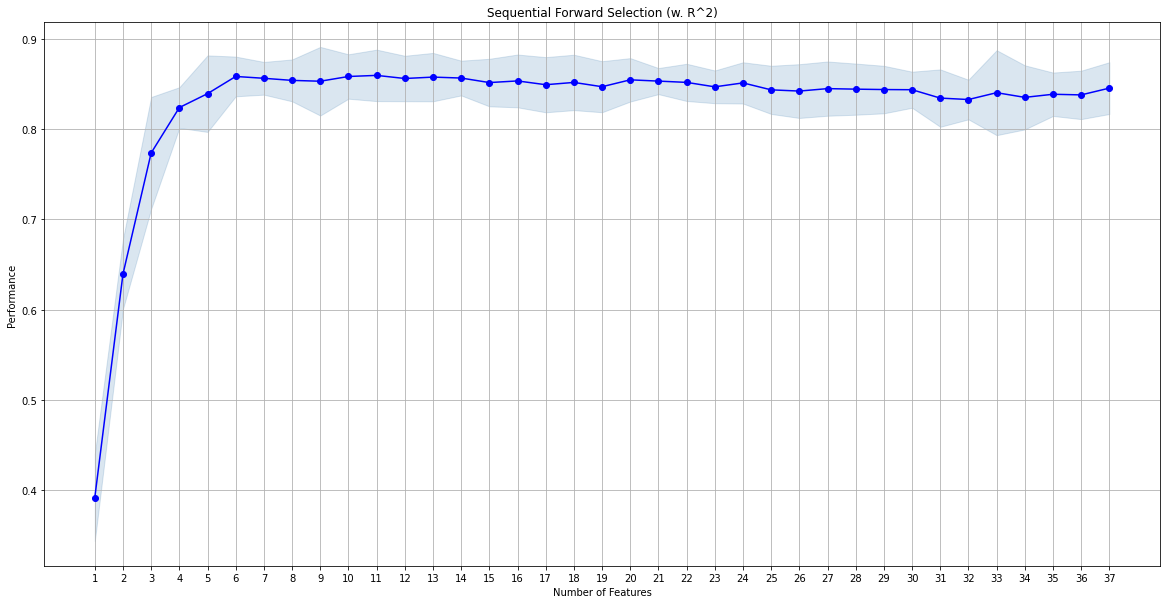

In [41]:
abr = BaggingRegressor()
sfs1 = SFS(abr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

##### 5b. For orginal attributes and new attributes:

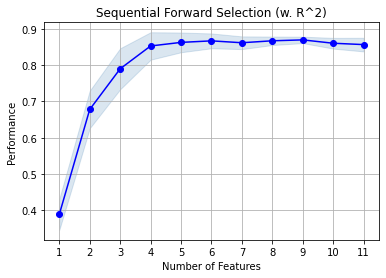

In [61]:
abr = BaggingRegressor()
sfs1 = SFS(abr, k_features=11, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_sc.values, y_1train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [62]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [63]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water/cement', 'coarseagg/fineagg', 'agg/cement']


#### 5bb. For orginal attributes and new attributes with their polynomial features:

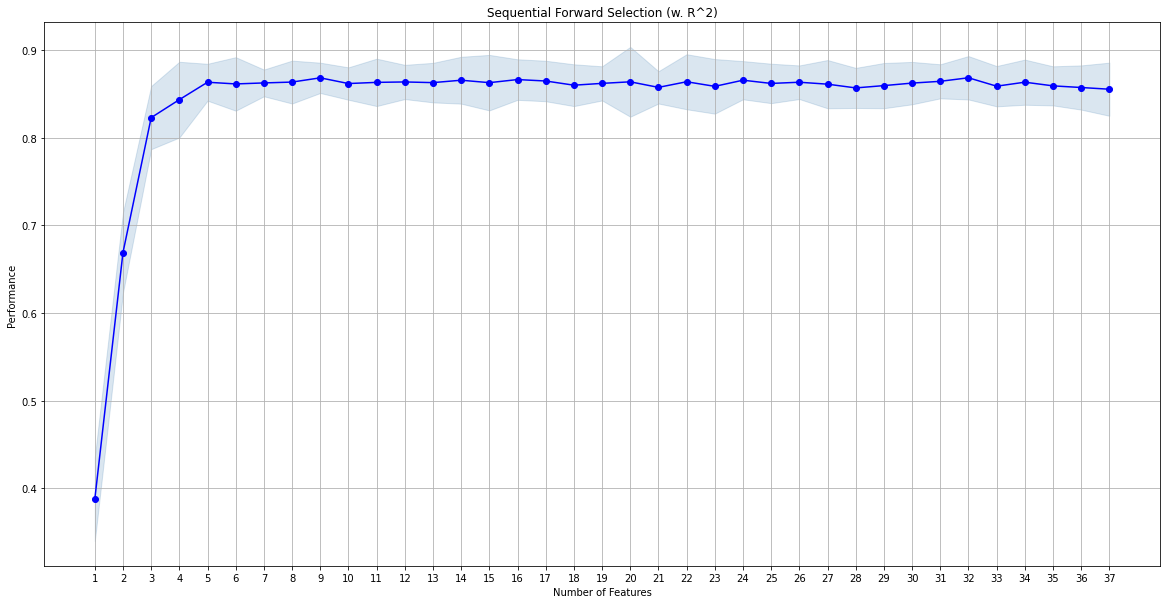

In [48]:
abr = BaggingRegressor()
sfs1 = SFS(abr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_scp.values, y_train_sc.values)
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [ ]:
columnList = list(x_1train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

##### Combined Inference:
1. Through this we are capable of achieving the performance of about 80-90% with orginal features.
2. Model With other than orginal features performance gradually decreases.
3. So we can further try building the model with orginal features and try improving the performance by hypertuning the parameters 

### Step 6: Sequential Forward Feature Selection - RandomForestRegression :

##### 6a.For orginal attributes:

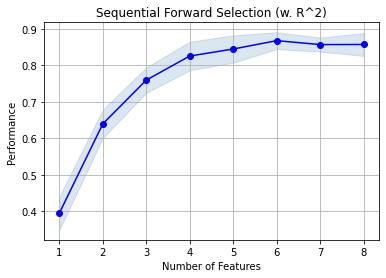

In [257]:
rfr = RandomForestRegressor()
sfs1 = SFS(rfr, k_features=8, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_sc.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [253]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7]


In [254]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### 6aa: For orginal attributes with their polynomial:

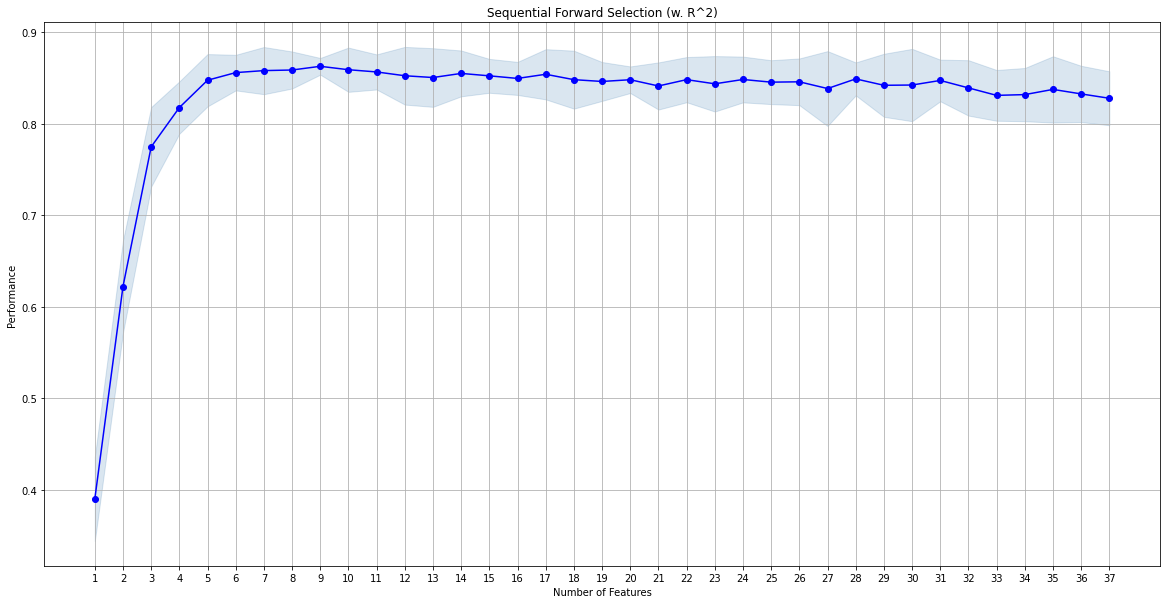

In [42]:
rfr = RandomForestRegressor()
sfs1 = SFS(rfr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [27]:
columnList = list(x_train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


##### 6b. For orginal attributes and new attributes:

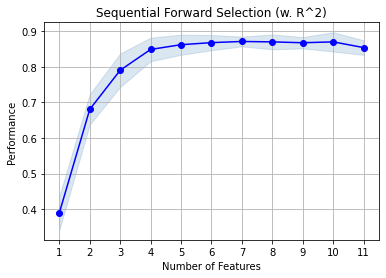

In [64]:
rfr = RandomForestRegressor()
sfs1 = SFS(rfr, k_features=11, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_sc.values, y_1train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [65]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [66]:
columnList = list(x_1train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water/cement', 'coarseagg/fineagg', 'agg/cement']


#### 6bb. For orginal attributes and new attributes with their polynomial features:

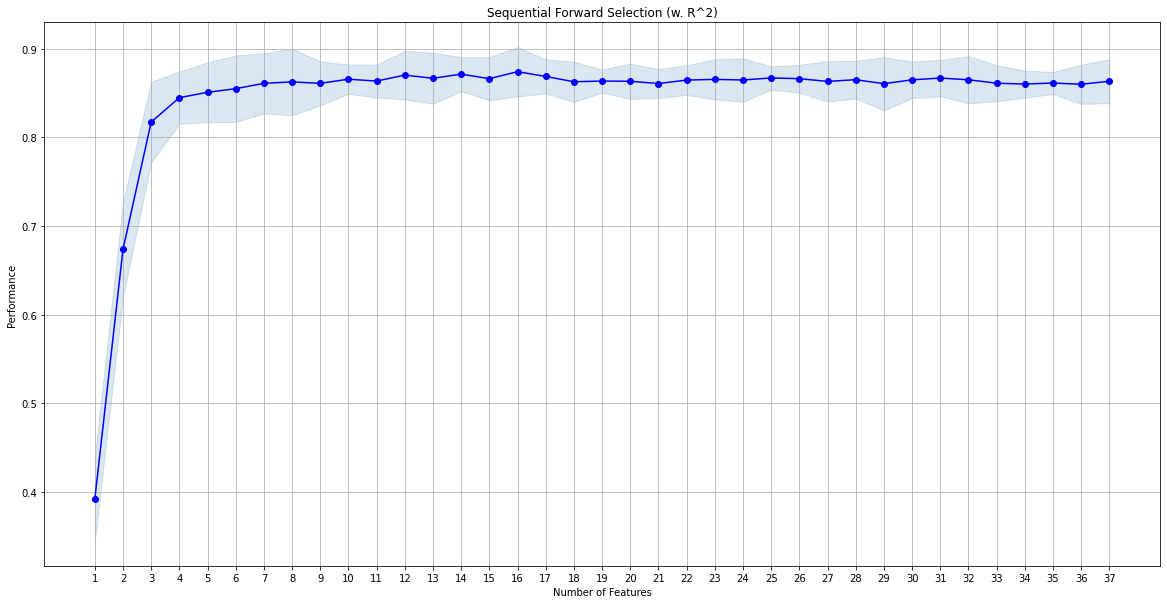

In [16]:
rfr = RandomForestRegressor()
sfs1 = SFS(rfr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_scp.values, y_train_sc.values)
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

##### Combined Inference:
1. Through this we are capable of achieving the performance of about 85 - 90% with orginal features.
2. Model With other than orginal features performance gradually decreases.
3. So we can further try building the model with orginal features and try improving the performance by hypertuning the parameters 

## Step 7: Sequential Forward Feature Selection - AdaBoostRegression :

##### 7a.For orginal attributes:

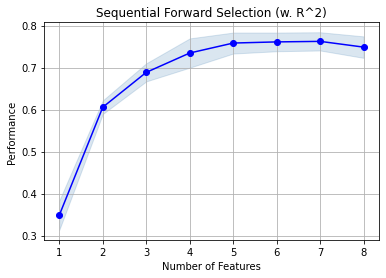

In [46]:
rfr = AdaBoostRegressor()
sfs1 = SFS(rfr, k_features=8, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_sc.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [47]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7]


In [48]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']


#### 7aa: For orginal attributes with their polynomial:

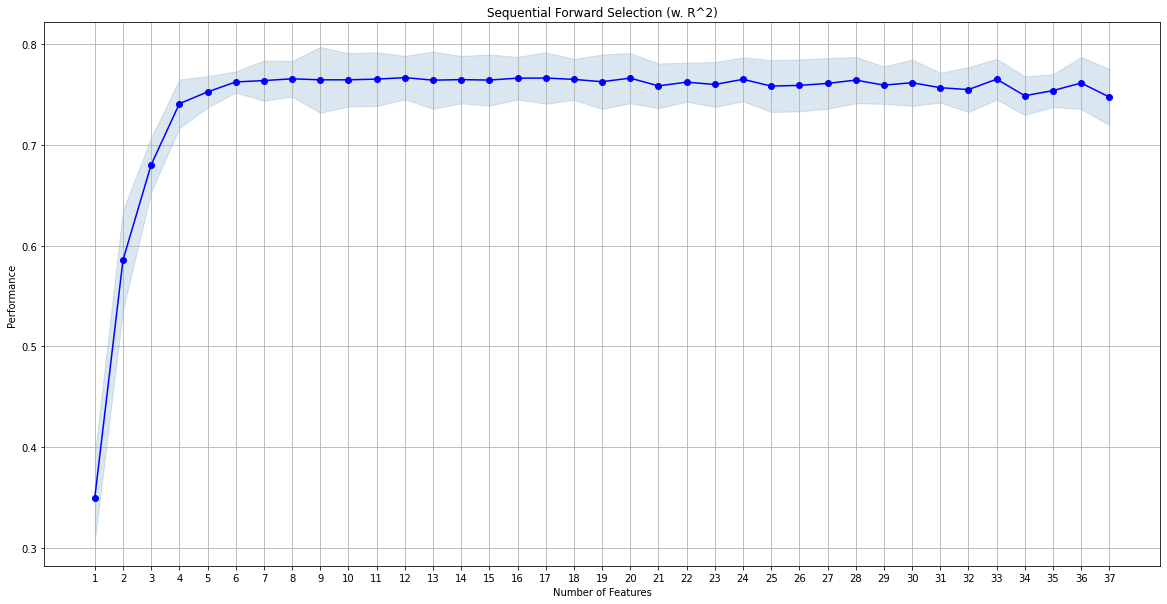

In [20]:
rfr = AdaBoostRegressor()
sfs1 = SFS(rfr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scp.values, y_train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [21]:
columnList = list(x_train_scp.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


##### 7b. For orginal attributes and new attributes:

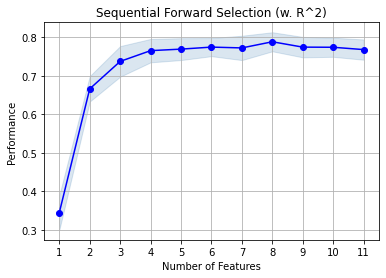

In [43]:
rfr = AdaBoostRegressor()
sfs1 = SFS(rfr, k_features=11, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_sc.values, y_1train_sc.values)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [44]:
columnList = list(x_1train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [45]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'water/cement', 'coarseagg/fineagg', 'agg/cement']


#### 7bb. For orginal attributes and new attributes with their polynomial features:

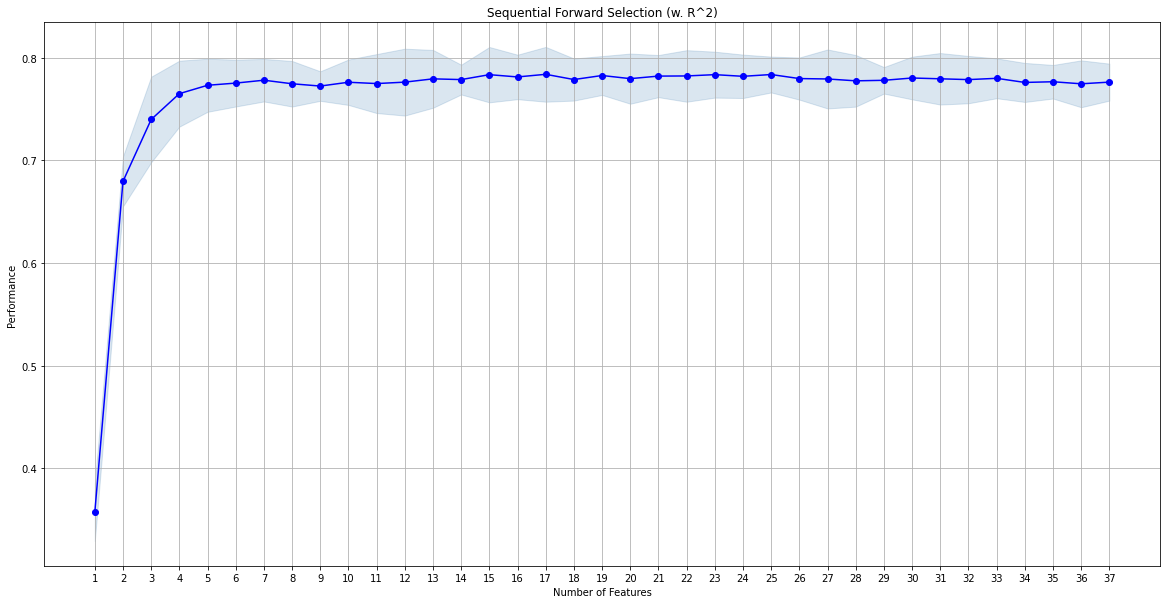

In [22]:
rfr = AdaBoostRegressor()
sfs1 = SFS(rfr, k_features=37, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_1train_scp.values, y_train_sc.values)
fig = plot_sfs(sfs1.get_metric_dict(),figsize = (20,10))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

##### Combined Inference:
1. Through this we are capable of achieving the performance of about 70-80% with orginal features.
2. Model With other than orginal features performance gradually decreases sometimes highly fluctuating and variance is also increasing..
3. So we can further try building the model with orginal features and try improving the performance by hypertuning the parameters 

##### Conclusion on the above analysis:
1. SFS was not done for the Decission Tree Regressor algorithm because the algorithm itself contains the module for knowing the important features. 
2. Based on the above analyisiit was commonly found that to have trade off between the bias and variance also to achieve better training performance it is better to build models with orginal features.
3. Other than Linear regression it is better to build the model on other algoriths which were subjected to SFS anlysis above.

1. Evwnthough few features that can be good predictors 

==================================================================================================================

# 3. Deliverable -3 (create the model ) ( 15 marks)

# 4. Deliverable -4 (Tuning the model) (20 marks)

# Building Model:

Let us build the model along with the new features

## Introduction:

### Business objective based models:
       To Generate machine learning model to predict the strength of the concrete for the given compnets so that we can easily dtermine the composoition of the components requiered to obtain a desiered strength. By doing so it will reduce the cost spent on building the sample for different combination of compositon of the particulars and determine best combination for desiered strength. This will create greater impact in the cost saving. 

## a. Decession Tree Classifier:

#### Step a: Building the model:

##### Iteration -1:
  Building the model using decission tree algorithm with the oginal dataset alone. The model is built using the inbuilt parameters and respective values of the algorithm.

In [153]:
dt_model = DecisionTreeRegressor() #Model building algorithm
dt_model.fit(x_train_sc, y_train_sc) #Training the model
dt_model.score(x_train_sc, y_train_sc) #Training data score.

0.9985374586814019

In [155]:
dt_model.score(x_test_sc, y_test_sc) #Testing Data score

0.7359998572739535

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the testing data upto 73.59% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  2. Skewness of the most of the features.

#### Calculating the Important Features:

In [156]:
feat_imp_dict = dict(zip(x_train_sc.columns, dt_model.feature_importances_)) #Extracting the important features.
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #Creating the dataframe.
feat_imp.sort_values(by=0, ascending=False) #To sort the values.

0
cement        0.365115
age           0.333493
water         0.096174
slag          0.091786
superplastic  0.049769
coarseagg     0.026055
fineagg       0.020126
ash           0.017482

##### Inference on the above ouputs:
  The above shows the list of important features obtained using DecissionTreeRegressor algorithm therefore attributes like 'ash' , 'coarseagg' , 'fineagg' and  'superplastic' seems to be the non - important features but the model did not get generalized well which can be observed using the performance of the model on testing data. Let us try building the model only with the above determined important features in the next iteration.

##### Iteration -2:
  Building the model using decission tree algorithm with only above determined importanat features. The model is built using the inbuilt parameters and respective values of the algorithm.

In [76]:
#Dropping the non - important features:
drop_cols = ['ash' , 'coarseagg' , 'fineagg' , 'superplastic' ]

X = x_train_sc
x = x_test_sc

x_train_scd = X.drop(labels= drop_cols , axis = 1)
x_test_scd = x.drop(labels= drop_cols , axis = 1)

# Building the model:
dt1_model = DecisionTreeRegressor() #Model building algorithm
dt1_model.fit(x_train_scd, y_train_sc) #Training the model
dt1_model.score(x_train_scd, y_train_sc)#Training data score.

0.9965507252123833

In [158]:
dt1_model.score(x_test_scd, y_test_sc) # Performance of the model on the testing data.

0.7816998568347937

#### Inference on the above ouputs:
1. We can still achieve better performance in this iteration.
2. But performance of training data is nearly 100% due to the nature of the algorithm of overfitting therefore demanding for pruning the model. Before pruning the model let us also try building the model using new features also.
3. Model  is capable of classifying and predicting the class output using the testing data upto 78.169% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  2. Skewness of the most of the features.
  
  

##### Iteration -3:
  Building the model using decission tree algorithm with orginal and new features. The model is built using the inbuilt parameters and respective values of the algorithm.

In [161]:
dt_1model = DecisionTreeRegressor() #Model building algorithm
dt_1model.fit(x_1train_sc, y_1train_sc) #Training the model
dt_1model.score(x_1train_sc, y_1train_sc) #Training data score.

0.9985374581169355

In [163]:
dt_1model.score(x_1test_sc, y_1test_sc)

0.7171481056169964

##### Inference on the above ouputs:
1. Performance of training data is nearly 100% due to the nature of the algorithm of overfitting therefore demanding for pruning the model.
2. Model  is capable of classifying and predicting the class output using the testing data upto 71.71% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  2. Skewness of the most of the features.

#### Calculating the Important Features:

In [215]:
feat_imp_dict = dict(zip(x_1train_sc.columns, dt_1model.feature_importances_)) #Extracting the important features.
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
water/cement       0.396733
age                0.338564
slag               0.081097
superplastic       0.050347
fineagg            0.049650
coarseagg          0.028159
water              0.019810
coarseagg/fineagg  0.009416
agg/cement         0.009115
ash                0.008760
cement             0.008348

##### Inference on the above ouputs:
  The above shows the list of important features obtained using DecissionTreeRegressor algorithm therefore attributes like 'ash' , 'coarseagg/fineagg' , 'superplastic', 'water' and 'cement' seems to be the non - important features but the model did not get generalized well which can be observed using the performance of the model on testing data. Let us try building the model only with the above determined important features in the next iteration.

##### Iteration -4:
  Building the model using decission tree algorithm with only above determined importanat features in the Iteration 3. The model is built using the inbuilt parameters and respective values of the algorithm.

In [164]:
#Dropping non - important features.
drop_cols = ['ash' , 'coarseagg/fineagg' , 'superplastic', 'water', 'cement' ]

X1 = x_1train_sc
x1 = x_1test_sc

x_1train_scd = X1.drop(labels= drop_cols , axis = 1)
x_1test_scd = x1.drop(labels= drop_cols , axis = 1)

dt_1model1 = DecisionTreeRegressor()  #Model building algorithm
dt_1model1.fit(x_1train_scd, y_train_sc) #Training the model.
dt_1model1.score(x_1train_scd, y_train_sc) #Training data score.

0.997664637183418

In [165]:
dt_1model1.score(x_1test_scd, y_test_sc) #testing the performance of the model using testing data.

0.6701185738998475

#### Inference on the above ouputs:
1. Performance in this iteratrions is very low compared to other iterations.
2. But performance of training data is nearly 100% due to the nature of the algorithm of overfitting therefore demanding for pruning the model.
3. Model  is capable of classifying and predicting the class output using the testing data upto 78.169% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  2. Skewness of the most of the features.
  
  

#### Iteration - 5: 
  Building the model on the normalized test data with all the attributes and without pruning the tree. This is done just to illustrate the effect of normalizing the data before spliiting the data.

In [167]:
dt_modeld = DecisionTreeRegressor() #Model building algorithm
dt_modeld.fit(x_traind, y_traind)   #Training the model
dt_modeld.score(x_traind, y_traind) # Performance of the model on training data.

0.9955841484104725

In [168]:
dt_modeld.score(x_testd, y_testd) #Testing the performance of the model on test data.

0.8363232128199382

#### Inference on the above ouputs:
1. The above model witout pruning give better performance on the test data.
2. But, we can not build a model in this manner and use it in production because the tree is overfitted and there is leakage of the test data into training data. 

 #### Iteration - 6

     In this iteration let us try building the model with the polynomial features and understand the performance of the model but as said before to decide on the usage of polynomial feature in the praactical scenario requieres domain knowledge. the procees went through is similar to the above iterations. For this iteration only a final inference is given not a step by step inference.

##### Buiding the model with polynomial features generated for orginal attributes alone:

In [170]:
dt_modelp = DecisionTreeRegressor()      # Model building algorithm
dt_modelp.fit(x_train_scp, y_train_sc)   # Training the model
dt_modelp.score(x_train_scp, y_train_sc) # Training data score

0.9985374586814019

In [171]:
dt_modelp.score(x_test_scp, y_test_sc) #Testing the performance of the model on the test data.

0.7432159229391773

#### Calculating the Important Features:

In [270]:
feat_imp_dict = dict(zip(x_train_scp.columns, dt_1model.feature_importances_)) #Extracting the important features.
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
8   0.396733
7   0.338564
1   0.081097
4   0.050347
6   0.049650
5   0.028159
3   0.019810
9   0.009416
10  0.009115
2   0.008760
0   0.008348

##### Buiding the model with polynomial features generated for orginal attributes alone an dby dropping the non-important features determined above:

In [172]:
#Droppinf the non-important features:
drop_cols = [0,2,10,9,3,5]

Xp = x_train_scp
xp = x_test_scp

x_train_scdp = Xp.drop(labels= drop_cols , axis = 1)
x_test_scdp = xp.drop(labels= drop_cols , axis = 1)

#Building the model:
dt1_modelp = DecisionTreeRegressor()  #Model building algorithm
dt1_modelp.fit(x_train_scdp, y_train_sc) #Training the model
dt1_modelp.score(x_train_scdp, y_train_sc) #Training data score.

0.9985374586814019

In [173]:
dt1_modelp.score(x_test_scdp, y_test_sc) #Testing the performance of the model on the test data.

0.6512793835383854

#### Inference on the above ouputs:
1. Better performance on the test data was not obtained here compared to the other iteration. 
2. But performance of training data is nearly 100% due to the nature of the algorithm of overfitting therefore demanding for pruning the model.
3. Model  is capable of classifying and predicting the class output using the testing data (datawithpolynomial features) upto 74.32% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  2. Skewness of the most of the features.
  
  

    Therefore among the above iterations better result on the test data was obtained by the the model that was built using the  orginal features. The below iteration is carried out by building th model on the orginal predictors by hypertuning the parameters with pruning the tree. 

##### Iteration 7:
#### Building the model and hypertuning the Prameters:    

In [77]:
# Tuning the Hyperparameters:
params_grid =[{"criterion":['mse'], "max_depth":list(np.arange(2,23))},{"criterion":['mae'], "max_depth":list(np.arange(2,23))}]
dtree_ = DecisionTreeRegressor(random_state=1) #Model building algorithm.
dTreeR = GridSearchCV(dtree_,params_grid)      #Hypertuning the parameters.
#Fitting the model:
dt_fit = dTreeR.fit(x_train_scd,y_train_sc)    #Training the model.
dt_fit

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['mse'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22]},
    

##### Inference on the above output:

 In the above cell Decision Regressor's model building process was carried out by tuning the hyperparameters like criterion and max_depth. 

#### Obtaining the best estimator and best parameters:

In [178]:
dt_fit.best_estimator_ #Gives best estimators.

DecisionTreeRegressor(criterion='mae', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [179]:
dt_fit.best_params_ #Extracting the best parameters.

{'criterion': 'mae', 'max_depth': 10}

##### Inference on the above output:

    The best parameters and best estimators are obtained as result of gridsearch algorithms search for optimum parameter. Using those parameters we can test the model's performance on the testing data.

#### Performance on validation data:

In [180]:
dt_fit.best_score_ #extracfting the performance of the model on validation data.

0.7678592448444539

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 76.78% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Performance on Production data:

In [78]:
print("Model Accuracy: {0:.4f}".format(dt_fit.score(x_test_scd,y_test_sc))) #evaluating the performance of the model on production data.

Model Accuracy: 0.7717


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 77.17% accuracy which is better than the performance value on the training data.

#### Step b: Visualizing the above obtained model:

In [79]:
dtree_pru = DecisionTreeRegressor(criterion='mae', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best') #Making use of the best estimators obtained using the gridsearch algorithm.
d_tree_pru = dtree_pru.fit(x_train_scd,y_train_sc) #Fitting the model with training data.

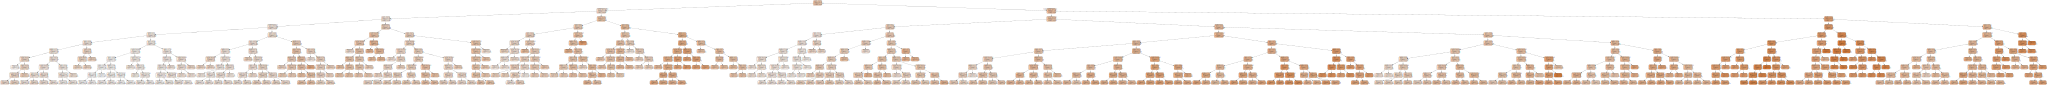

In [80]:
dot_data = tree.export_graphviz(d_tree_pru, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("d_tree") 

dot_data = tree.export_graphviz(d_tree_pru, out_file=None, 
                     feature_names=x_train_scd.columns,  
                     class_names= ['0','1'],  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### Calculating the Important Features:

In [184]:
feat_imp_dict = dict(zip(x_train_scd.columns, d_tree_pru.feature_importances_)) #Extracting the important features.
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
cement  0.354328
age     0.292668
water   0.210280
slag    0.142724

##### Inference on the above output:
 It can be seen that out of 8 features only four features like cement, age, water and slag are important in determining the compressioin strength of the concrete. But let us try achieveing some higher performance on the testing data by building algorithms through other algorithms

## b. KNeighborsRegressor (KNR):

KNN algoritham works as follows:
1. Creates clssification of labels for their respective features using the training data.
2. Gets a query point as input.
3. Measures distance of the query point with all other data points.
4. Arranges the distance values in the ascening order.
5. Based on K value given in the model it take out the first K distance values arranged in ascending order.
6. In the first K distance value the algoritham looks for the presence of the majority class and the query point is classified to the majority class.

Note:
 In case the distance value is same with the K nearest points to break this tie, it is recommended to use the K value as odd numbers.

#### Step1: Creating odd list of K for KNR:

In [12]:
mylist = list(range(1,20)) #Creating list of values from 1 to 20.
kneigh = list(filter(lambda x: x % 2 != 0, mylist)) #Extracting odd values form the above values.
kneigh

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

##### Inference of the above output:
  We have created odd values of K in the range of 1 to 20

#### Step 2: Building the model using KNN algorithms:

In [20]:
R_sq_scores = [] #Creating empty list to store the R^2scores that we are about to obtain.

for k in kneigh:
    knr = KNeighborsRegressor(n_neighbors=k,weights='distance') #Constructing the model using the inbuilt function of K nearest neighbors in sklearn package.
    knr.fit(x_train_sc, y_train_sc) #Trining the model using the training data.
    scores = knr.score(x_train_sc, y_train_sc) #evaluating the score.
    R_sq_scores.append(scores) #Storing the accuracy scores to the above crated list
  
 #Creating the dataframe of R^2 scores and R^2 value for various K values.
a = pd.DataFrame((ac_scores),columns = ['R^2 Scores']) 
a['K value'] = kneigh
a

R^2 Scores  K value
0    0.997155        1
1    0.998537        3
2    0.998537        5
3    0.998537        7
4    0.998537        9
5    0.998537       11
6    0.998537       13
7    0.998537       15
8    0.998537       17
9    0.998537       19

##### Inference on the above output:
   We have created the model and built a dataframe that consist of Accuracy scores, MisClassification error for odd K values using the model built from KNN algorithm. 

#### Step 3: Deciding the optimal K value: 

Text(0, 0.5, 'R_sq value')

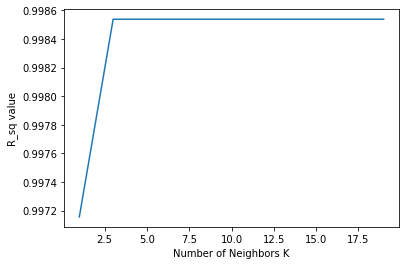

In [19]:
# determining best k value by ploting the K value vs misclassification error.
optimal_k = kneigh[R_sq.index(min(R_sq))]

plt.plot(kneigh, R_sq)
plt.xlabel('Number of Neighbors K')
plt.ylabel('R_sq value')

##### Inference on the above output:
  From the above graph and DataFrame in previous step it can be found that the K value of 3 have very good R_sq value of 99.8% nearly 100% mwning model is also capturing the noises this will lead to the poor performance of the model on the testing data but still let try fitting the model by hypertuning the parameters. 

#### Step 4: Constructing the final model : 
  Here we construct the final model with the optimum nearest neighbour value. After several iterations like building the model with original attributes/ orginal attributes with new attributes/ with polynomial attributes it was found that the model built on orginal attribute by dropping the features like 'coarseagg', 'fineagg' and 'age' which was dtetermined as very poor predictors in the pairplot  gave much less difference between the training and testing data which is illustrated below. Th model building was also subject to build with the important features determined through SFS but did redulted in very poor performance than which is obtained below. In order to have better picturization of the process without confusion and with the midset of achieveing better model alone at the maximum under each algorithm, the iteration which gave the good result is alone displayed here.

In [72]:
# Tuning the Hyperparameters:
params_grid =[{"n_neighbors":[3,5,7,9,10], "weights":['uniform', 'distance'],"algorithm":['ball_tree', 'kd_tree', 'brute']}]
knr_ = KNeighborsRegressor()
knr = GridSearchCV(knr_,params_grid)
#Fitting the model:
x_train_scknr = x_train_sc.drop([ 'coarseagg', 'fineagg', 'age'],axis = 1)
knr_fit = knr.fit(x_train_scknr,y_train_sc)
knr_fit

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7, 9, 10],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:
1. We have constructed the final model with k range (from  of values that uses eucledian distance(because when minikowiski ditance p value is 2 then it equals to eucledian distance) to meaure the distance between the query and data points.
2. The model is trained with the training data.

#### Step 2: Fetching the best estimators and best parameters:

In [32]:
knr_fit.best_estimator_ #Fetching the best estimators from the hypertuned model.

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [33]:
knr_fit.best_params_ #Extracting the best parameters.

{'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'uniform'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 6: Performance of our modelon the validataion data:

In [73]:
(knr_fit.score(x_train_scknr,y_train_sc)) #extracfting the performance of the model on validation data.

0.5557073239315395

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 60% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 5: Performance of our model with production data:

In [74]:
x_test_scknr = x_test_sc.drop([ 'coarseagg', 'fineagg', 'age'],axis = 1)
(knr.score(x_test_scknr,y_test_sc)) #extracfting the performance of the model on production data.

0.5097526943706877

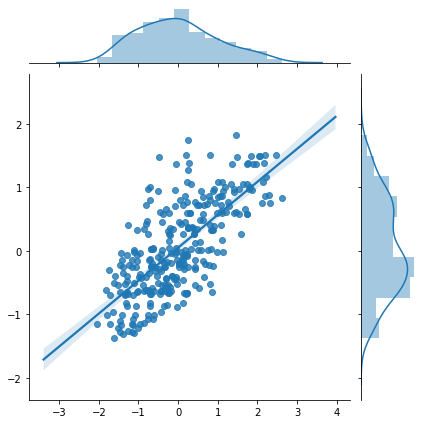

In [38]:
y_pred = knr_fit.predict(x_test_scknr)
sns.jointplot(y_test_sc, y_pred, kind='reg')

#### Inference on the above ouputs:
1. Better performance on both the test and training data was not obtained because they range around ony 50 - 60%. 
2. But the model is underfitting the data.
3. Model  is capable of classifying and predicting the class output using the testing data  upto 51.97% accuracy which is slightly lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  2. Skewness of the most of the features.
  
##### Note:
1. There was also attempt to understand the correlation between the test and predicted data (predicted using built model) to have some more understandning but unfortunately the plot didnt give me the pearson r vaule due to some internal problems.

2. The above iteration can also be tried by determining the best k - values using different sores like mean squared error or mean absolute error. 
  
3. Let us try achieveing better performance ranges using some other algorithms.

## c.Random Forest:

#### Step 1: Building the model using Hyperparameter tuning:

    Here the model is built using the features that were selcted using the SFS analysis through which it was concluded that the building the model with the orginal feature is better to have optimal trade off between the bias and variance.

In [70]:
# Building the model using hyperparameter tuning:
params_grid =[{"criterion":['mse'],"n_estimators":[x for x in np.arange(10,101)]},{"criterion":['mae'],"n_estimators":[x for x in np.arange(10,101)]}]
raf = RandomForestRegressor(random_state=1)
ra_f = GridSearchCV(raf,params_grid)
#Fitting the training data into the model:
ra_f.fit(x_train_sc,y_train_sc)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_stat...
             param_grid=[{'criterion': ['mse'],
                          'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                         

##### Inference on the above output:

 In the above cell RandomForest Regressor's model building process was carried out by tuning the hyperparameters like criterion and max_depth. 

#### Step 2: Fetching the best estimators and best parameters:

In [192]:
ra_f.best_estimator_ #Fetching the best estimators from the hypertuned model.

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [193]:
ra_f.best_params_ #Extracting the best parameters.

{'criterion': 'mae', 'n_estimators': 100}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on validation data:

In [194]:
ra_f.best_score_ #extracfting the performance of the model on validation data.

0.8621505517746014

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 86.21% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on production data:

In [71]:
(ra_f.score(x_test_sc,y_test_sc)) #extracfting the performance of the model on production data.

0.8832776578864316

#### Inference on the above ouputs:
1. Better performance on both the test and training data was obtained because they range around ony 85 - 90%. 
2. The model have very good trade off between the bias and variance.
3. Model  is capable of classifying and predicting the class output using the testing data  upto 88.32% accuracy which is higher than the performance on the training data, a good model should give better performance on testing data than on the training data and it is achieved in this model. But still let us try whter anyother model gives better result range or similar to this model.

## d. Bagging Classifier:

  Fetchest best model for a given base estimator by building the model parallely.

#### Step 1: Building the model by tuning the hyper parameter:

    Here the model is built using the features that were selcted using the SFS analysis through which it was concluded that the building the model with the orginal feature is better to have otimal trade off between the bias and variance.

In [68]:
# Building the model using hyperparameter tuning:
params_grid =[{"base_estimator":[KNeighborsRegressor()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[SVR()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[LinearRegression()],"n_estimators":[x for x in np.arange(10,51)]}]
bag=BaggingRegressor( max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bag_parallel = GridSearchCV(bag,params_grid)
#Fitting the training data into the model:
bag_parallel.fit(x_train_sc,y_train_sc)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=0.7,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=True, random_state=22,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'base_estimator': [KNeighborsRegressor(algorithm='aut...
                                           19, 20, 21, 22, 23, 24, 25, 26, 27,
                                           28, 29, 30, 31, 32, 33, 34, 35, 36,
                                           37, 38, 39, ...]},
                         {'base_estimator': [LinearRegression(copy_X=True,
                                                              fit_intercept=True,
              

##### Inference on the above output:

In the above cell the model's hyperparameters like base estimators and no.of estimators are tuned for different algos and different depths respectively. But here base estimator was not tuned using decisssion tree regressor because random forest regressor is already used for model building.

#### Step 2: Fetching the best estimators and best parameters:

In [197]:
bag_parallel.best_estimator_ #Fetching the best estimators from the hypertuned model.

BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma='auto_deprecated',
                                    kernel='rbf', max_iter=-1, shrinking=True,
                                    tol=0.001, verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.7, n_estimators=33, n_jobs=None, oob_score=True,
                 random_state=22, verbose=0, warm_start=False)

In [198]:
bag_parallel.best_params_ #Extracting the best parameters.

{'base_estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
     gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
     tol=0.001, verbose=False), 'n_estimators': 33}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on Validation data:

In [199]:
bag_parallel.best_score_ #extracfting the performance of the model on validation data.

0.7783293438259632

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 77.83% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Production data:

In [69]:
bag_parallel.score(x_test_sc,y_test_sc) #extracfting the performance of the model on production data.

0.7959727600474266

##### Out-of-bag score:

In [41]:
bagg=BaggingRegressor( KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), n_estimators= 34, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bagg.fit(x_test_sc, y_test_sc)
bagg.oob_score_ #Method for obtaining the out-of-bag score.


0.5680286771028819

#### Inference on the above ouputs:
1. Good performance on both the test and training data was obtained because they range around ony 75 - 80%. 
2. The model have good trade off between the bias and variance.
3. Model  is capable of classifying and predicting the class output using the testing data  upto 79.59% ~ 80% accuracy which is higher than the performance on the training data, a good model should give better performance on testing data than on the training data and it is achieved in this model. But still let us try whether anyother model gives better result range or similar to this model.

## e.AdaBoostingRegressor:

 Fetchest best model for a given base estimator by building the model sequentially.

#### Step 1: Building the model by tuning the hyper parameter:

    Here the model is built using the features that were selcted using the SFS analysis through which it was concluded that the building the model with the orginal feature is better to have optimal trade off between the bias and variance.

In [66]:
from sklearn.tree import DecisionTreeClassifier
# Building the model using hyperparameter tuning:
params_grid =[{"base_estimator":[LinearRegression()],"n_estimators":[x for x in np.arange(10,101)]},
             {"base_estimator":[SVR()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[DecisionTreeRegressor()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[KNeighborsRegressor()],"n_estimators":[x for x in np.arange(10,51)]}]
boost_ada =AdaBoostRegressor(learning_rate=0.1, random_state=2)
boost_ada_seq = GridSearchCV(boost_ada,params_grid)
#Fitting the training data into the model:
boost_ada_seq.fit(x_train_sc,y_train_sc)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=0.1,
                                         loss='linear', n_estimators=50,
                                         random_state=2),
             iid='warn', n_jobs=None,
             param_grid=[{'base_estimator': [LinearRegression(copy_X=True,
                                                              fit_intercept=True,
                                                              n_jobs=None,
                                                              normalize=False)],
                          'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                           19, 20, 21...
                         {'base_estimator': [KNeighborsRegressor(algorithm='auto',
                                                                 leaf_size=30,
                                                                 metric='minkowski

##### Inference on the above output:

In the above cell the model's hyperparameters like base estimators and n_estimators are tuned for different algos and different no.of estimators respectively.  

#### Step 2: Fetching the best estimators and best parameters:

In [148]:
boost_ada_seq.best_estimator_ #Fetching the best estimators from the hypertuned model.

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=50,
                  rando

In [149]:
boost_ada_seq.best_params_ #Extracting the best parameters.

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'n_estimators': 50}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on Validation data:

In [150]:
boost_ada_seq.best_score_ #extracfting the performance of the model on validation data.

0.8565750723834312

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 85.65% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on production data:

In [67]:
boost_ada_seq.score(x_test_sc,y_test_sc) #extracfting the performance of the model on production data.

0.8708741856103055

#### Inference on the above ouputs:
1. Good performance on both the test and training data was obtained because they range around ony 85 - 90%. 
2. The model have very good trade off between the bias and variance.
3. Model  is capable of classifying and predicting the class output using the testing data  upto 87.08% accuracy which is higher than the performance on the training data, a good model should give better performance on testing data than on the training data and it is achieved in this model. But still let us try whether anyother model gives better result range or similar to this model.

## f.GradientBoostingRegressor:

 Fetchest best model for a given base estimator by building the model sequentially.

#### Step 1: Building the model by tuning the hyper parameter:

    Here the model is built using the features that were selcted using the SFS analysis through which it was concluded that the building the model with the orginal feature is better to have optimal trade off between the bias and variance.

In [64]:
# Building the model using hyperparameter tuning:
params_grid =[{"criterion":["friedman_mse"],"n_estimators":[x for x in np.arange(10,101)]},
             {"criterion":["mse"],"n_estimators":[x for x in np.arange(10,51)]},
             {"criterion":["mae"],"n_estimators":[x for x in np.arange(10,51)]}]
boost_gra =GradientBoostingRegressor(learning_rate=0.1, random_state=2)
boost_gra_seq = GridSearchCV(boost_gra,params_grid)
#Fitting the training data into the model:
boost_gra_seq.fit(x_train_sc,y_train_sc)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...
                         {'cr

##### Inference on the above output:

In the above cell the model's hyperparameters like base estimators and n_estimators are tuned for different algos and different no.of estimators respectively.  

#### Step 2: Fetching the best estimators and best parameters:

In [202]:
boost_gra_seq.best_estimator_ #Fetching the best estimators from the hypertuned model.

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [203]:
boost_gra_seq.best_params_ #Extracting the best parameters.

{'criterion': 'friedman_mse', 'n_estimators': 100}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on validation data:

In [204]:
boost_gra_seq.best_score_ #extracfting the performance of the model on validation data.

0.8665627333581221

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 86.76% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on production data:

In [65]:
boost_gra_seq.score(x_test_sc,y_test_sc) #extracfting the performance of the model on production data.

0.8748628832311951

#### Inference on the above ouputs:
1. Good performance on both the test and training data was obtained because they range around ony 85 - 90%. 
2. The model have very good trade off between the bias and variance.
3. Model  is capable of classifying and predicting the class output using the testing data  upto 87.48% accuracy which is higher than the performance on the training data, a good model should give better performance on testing data than on the training data and it is achieved in this model. But still let us try whether anyother model gives better result range or similar to this model.

## g. Support Vector Regressor:

#### Step 1: Building the model by tuning the hyper parameter:

    Here the model is built using the features that were selcted using the SFS analysis through which it was concluded that the building the model with the orginal feature is better to have optimal trade off between the bias and variance.

In [61]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp =SVR( )
supp_vec = GridSearchCV(supp,params_grid)
#Fitting the training data into the model:
supp_vec.fit(x_train_sc,y_train_sc)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 2: Fetching the best estimators and best parameters:

In [140]:
supp_vec.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [141]:
supp_vec.best_params_ #Extracting the best parameters.

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on Validation data:

In [63]:
supp_vec.best_score_ #extracfting the accuracy on validation data.

0.8540088018298188

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 85.40% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Production data:

In [146]:
supp_vec.score(x_test_sc,y_test_sc) #extracfting the performance of the model on production data.

0.8464118863087406

#### Inference on the above ouputs:
1. Good performance on both the test and training data was obtained because they range around ony 80 - 87%. 
2. The model have slight trade off between the bias and variance but the validation data as much better performance than the production data.
3. Model  is capable of classifying and predicting the class output using the production data  upto 84.64% accuracy which is slightly lower than the performance on the training data, a good model should give better performance on testing data than on the training data.

## h. Stacking Classifier:

#### Step 1: Building the model by tuning the hyper parameter:
    
     Initially we build level one of regressors, the algorithms for those regressors are those that were used to build model in the previous steps. The parameters are hyperparameters that were found to be best in the previous steps are again used for the classifiers given as input in the level one regression and thier predictors are passed to build a meta - regressor. Here the meta-regressor used is Support Vector Regressor algorithm. The data used is the data with orginal attributes. 

In [58]:
# Building Level one classifier:
cl1 = LinearRegression() # logistic Regression.

cl2 = KNeighborsRegressor(algorithm = 'kd_tree', n_neighbors = 5, weights = 'distance') # K nearest neighbour.


#Decission Tree classifier
cl3 = DecisionTreeRegressor(criterion='mae', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

#Support Vector Regressor
cl4 = SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)  

#Bagging Classifier
cl5 = BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=5,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.7, n_estimators=34, n_jobs=None, oob_score=True,
                 random_state=22, verbose=0, warm_start=False)


#GradientBoosting Classifier
cl6 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

# Building Meta Classifier model:
met_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=94,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)  #Random Forest Classsifier

# Stacking the level one classifiers and building the stacking classifier using the inbuilt func available in the mlxtend.classifier.
stac_reg = StackingRegressor([cl1, cl2, cl3, cl4, cl5, cl6], met_reg)


##### Inference of the above output:
 The stacking regressors are built and are ready to get trained and undergo cross validation to measure the model performance.

#### Step 2.: Cross validation:

In [51]:
xt = x_train_sc.astype('int64')
yt = y_train_sc.astype('int64')

In [60]:
print('3-fold cross validation:\n')

for clf, label in zip([cl1, cl2, cl3, cl4, cl5, cl6,  met_reg], 
                      ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'SuppotVectorRegressor', 'BaggingRegressor', 'GradientBoostingRegressor', 'StackingRegressor']):

    scores = cross_val_score(clf, xd, yd, cv=3 ) # Performing  3 fold cross-validation parallely measuring the performance of the models.
    print("Performance score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:

Performance score: 0.59 (+/- 0.05) [LinearRegression]
Performance score: 0.72 (+/- 0.02) [KNeighborsRegressor]
Performance score: 0.82 (+/- 0.01) [DecisionTreeRegressor]
Performance score: 0.17 (+/- 0.02) [SuppotVectorRegressor]
Performance score: 0.65 (+/- 0.02) [BaggingRegressor]
Performance score: 0.88 (+/- 0.01) [GradientBoostingRegressor]
Performance score: 0.89 (+/- 0.00) [StackingRegressor]


##### Inference on the above output:
1. The Stacking Regressor gives performance of 89%.
2. The model was cross validated.
3. The cross validation was carried out in the three folds manner.
5. It can be found that the Stacking Classifier (i.e) our meta classifier -  Randomforest Regressor have better performance when its model is built upon the given data.

#### Sumarizing the accuracy of the models on the test data:

In [81]:
pd.DataFrame({'Classifiers':['DecissionTree Regressor', 'KNeighboursRegressor', 'RandomForestRegressor', 'BaggingRegressor', 'AdaBoostingRegressor', 'GradientBoostingRegressor', 'Support Vector Regressor', 'StackingRegressor'],
              'Performance of the model on Validation data (in %)':[(dt_fit.score(x_test_scd,y_test_sc))*100, (knr_fit.score(x_train_scknr,y_train_sc))*100, (ra_f.score(x_test_sc,y_test_sc))*100, (bag_parallel.score(x_test_sc,y_test_sc))*100, (boost_ada_seq.score(x_test_sc,y_test_sc))*100, (boost_gra_seq.score(x_test_sc,y_test_sc))*100, (supp_vec.score(x_test_sc,y_test_sc))*100, (0.89)*100 ]})

Classifiers  \
0    DecissionTree Regressor   
1       KNeighboursRegressor   
2      RandomForestRegressor   
3           BaggingRegressor   
4       AdaBoostingRegressor   
5  GradientBoostingRegressor   
6   Support Vector Regressor   
7          StackingRegressor   

   Performance of the model on Validation data (in %)  
0                                          77.167158   
1                                          55.570732   
2                                          88.327766   
3                                          79.597276   
4                                          87.087419   
5                                          87.486288   
6                                          84.641189   
7                                          89.000000

##### Inference on the above output:
1. Stacking Regressor seems to perform well on the production Data, next to it Random Forest Regressor seems to perform well on the production data.
2. Either of the models can be deployed in the production.
3. But usage of Stacking regressor requieres other regressors, particularly we have achieved this score by using the best parameters that was obtained after hypertuning the parameters of the regressors that was used in the level one regressor of the stacking regressor.
4. So it is better to go with random Forest Regressor.
5. Let us also try building the models using bootstrap sampling then further make a final conclusion but based on the process we can use RandomForest Regressor.

=====================================================================================================================

## Building the model by generating the training and testing data by Bootstraping:

       The bootstrapping is done on the data with the orginal feature alone because it is a time consuming process. In this inference is not given for each step only final conclusion on model selection based on the performance for 95% confidence is alone given.

#### Step 1: Prparing the data for resampling:

In [13]:
#Droppin the new features from the data:
data_b = data.drop(['water/cement', 'coarseagg/fineagg',
       'agg/cement'], axis = 1)
c = data_b.columns

# Normalizing the data:
scale = StandardScaler()
data_b_sc = pd.DataFrame(scale.fit_transform(data_b))
data_b_sc.columns  = c
data_b_scv = data_b_sc.values
data_b_scv

array([[-1.31679229,  1.6249842 , -0.86537497, ..., -0.30122194,
        -0.28031213, -0.32932808],
       [-1.05215156, -0.34650182,  1.07148566, ...,  0.29279711,
        -0.50008208, -0.72129915],
       [-0.2745297 , -0.83647066,  0.62583631, ...,  1.10225704,
        -0.28031213, -0.37049118],
       ...,
       [-0.02139508,  0.51036313,  0.54169273, ..., -0.05464799,
        -0.28031213,  0.55475714],
       [ 0.60760608, -0.39526649, -0.86537497, ..., -1.27880047,
         3.51856854,  1.21705309],
       [ 2.50611568, -0.83647066, -0.86537497, ..., -1.98863456,
        -0.60996706,  1.06653128]])

#### Step 2: Building the model using the Decission tree Regressor algorithm:

In [291]:
n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(data_b_sc.values) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(data_b_scv, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in data_b_scv if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	dtree = DecisionTreeRegressor(criterion='mae', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')
	dtree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = dtree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = dtree.score(test[:, :-1] , y_test)

	stats.append(score)


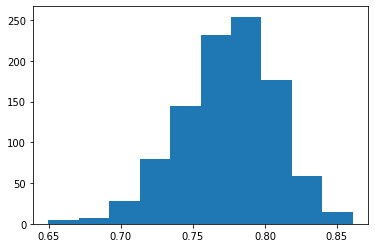

95.0 confidence interval 70.3% and 83.5%


In [292]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Step 3: Building the model using the kneighbor Regressor algorithm:

In [14]:
n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(data_b_sc.values) * 1)    # size of a bootstrap sample

# run bootstrap
stats_knrb = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(data_b_scv, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in data_b_scv if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	knrb = KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='distance')
	knrb.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = knrb.predict(test[:, :-1])   # predict based on independent variables in the test data
	score_knrb = knrb.score(test[:, :-1] , y_test)

	stats_knrb.append(score_knrb)


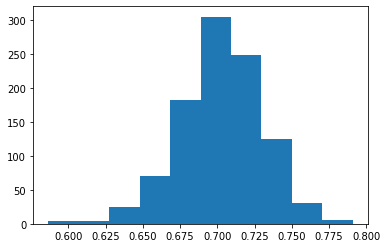

95.0 confidence interval 64.3% and 75.3%


In [16]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats_knrb)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_knrb, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_knrb, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Step 4: Building the model using the RandomForest Regressor algorithm:

In [19]:
n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(data_b_sc.values) * 1)    # size of a bootstrap sample

# run bootstrap
stats_rfrb = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(data_b_scv, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in data_b_scv if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	rfrb = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=78,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)
	rfrb.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = rfrb.predict(test[:, :-1])   # predict based on independent variables in the test data
	score_rfrb = rfrb.score(test[:, :-1] , y_test)

	stats_rfrb.append(score_rfrb)


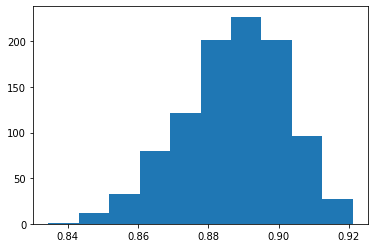

95.0 confidence interval 85.6% and 91.3%


In [20]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats_rfrb)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_rfrb, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_rfrb, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Step 5: Building the model using the Bagging Regressor algorithm:

In [21]:
n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(data_b_sc.values) * 1)    # size of a bootstrap sample

# run bootstrap
stats_bab = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(data_b_scv, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in data_b_scv if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	bab = BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma='auto_deprecated',
                                    kernel='rbf', max_iter=-1, shrinking=True,
                                    tol=0.001, verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.7, n_estimators=33, n_jobs=None, oob_score=True,
                 random_state=22, verbose=0, warm_start=False)
	bab.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = bab.predict(test[:, :-1])   # predict based on independent variables in the test data
	score_bab = bab.score(test[:, :-1] , y_test)

	stats_bab.append(score_bab)


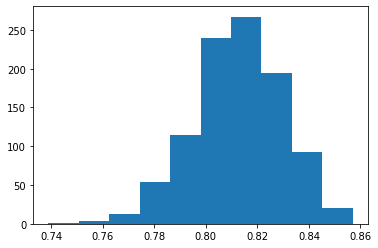

95.0 confidence interval 77.7% and 84.3%


In [23]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats_bab)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_bab, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_bab, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Step 6: Building the model using the AdaBoostingRegressor algorithm:

In [24]:

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(data_b_sc.values) * 1)    # size of a bootstrap sample

# run bootstrap
stats_adb = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(data_b_scv, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in data_b_scv if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	adb = GradientBoostingRegressor(n_estimators=50)
	adb.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = adb.predict(test[:, :-1])   # predict based on independent variables in the test data
	score_adb = adb.score(test[:, :-1] , y_test)

	stats_adb.append(score_adb)


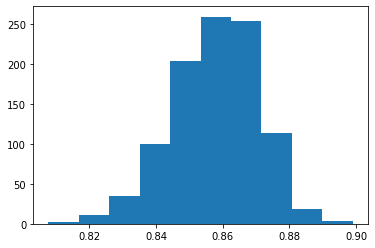

95.0 confidence interval 83.0% and 88.1%


In [26]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats_adb)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats_adb, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats_adb, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Step 7: Building the model using the GradientBoostRegressor algorithm:

In [289]:

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(data_b_sc.values) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(data_b_scv, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in data_b_scv if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingRegressor(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test)

	stats.append(score)


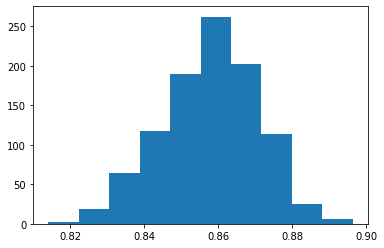

95.0 confidence interval 83.2% and 88.1%


In [290]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Combined infernece for the models built on the Bootstraped data  for the 95% Confidence interval:
  Model built using the RandomForest Regressor algorithm seems to perform well on the bootstraped data than other model built using the bootstraped data.
  
  Let us also try building the Random forest model by hypertuning the parameters using the RandomSearchCV.


## RandomForestRegressor model using RandomSearchCV:

In [19]:
# Number of trees in random forest in continuous range
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Building the model 
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# training the random search model
rf_random.fit(x_train_sc, y_train_sc);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.8s finished


#### Performance of the model on the production data:

In [18]:
best_random.score(x_test_sc , y_test_sc)

0.8834020282885764

#### Inference on the above output:
 1. The model performance is simialr to that of the performance obtained in the GridSearchCV.
 2. The richeness of RandomSearch method of hypertuning the parameterscan be appreciated only for large number of features.
 3. Here the features are very less.
 4. The continuous range for parameters can be given through randint also which gives uniform range distribution from desired ditribution of values.

### Conclusion:
 1. Initally the data was subjected to all preprocessing steps.
 2. Extensive search for building the model seperately for different groups was made through the cluster analysis technique with orginal attributes but we could have seen different senario if we have done cluster anlaysis with the new features also with polynomial features.
 3. Around 80% of time was utilized in understanding, analyzing and selecting the features. 
 4. The RandomForest Regressor algorithm's model built using bootstraped sample performs better than the model built using the data that was split using the sklearn's model selection. 
 5.  Therefore it is better to deploy a model built using the RandomForestRegressor algorithm using bootstrapped sample or the other one.
 6. We could have seen different results if the each above built model's parameters are hypertuned with the differnt range of values(if possible).
 7. There was no attempt to build the model with Lasso or Ridge Regression.
 8. The other opportunities for imporvement are:
         a. Measuring the model performance using the different performance measures.
         b. With the domain knowledge outlier treatment could have been carried out like decision on removing outliers or investingating the reason for outliers and treating accordingly.
         c. The Fearure selection can also be carried out using other methods through which the entire senario could have changed.
         d. Applying tuning to the hyperparameters of the models built in the bootstrap sampling.

=====================================================================================================================